In [1]:
import re
import string 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import pickle5 as pickle
import scipy.sparse
from nltk import *
#preprocessing and scoring
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score
from nltk.stem import WordNetLemmatizer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB

#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import pandas as pd
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df.columns =['tag', 'id', 'date', 'Query','name','text']
#df.head()

In [3]:
df = df.sample(10000)

In [4]:
df = df[["tag", "id", "name","text"]]
#df.head()

In [5]:
df.shape

(10000, 4)

In [6]:
df['text'] = df['text'].str.strip().str.lower()
#df.head()

Text(0.5, 1.0, 'Positive and Negative Distribution')

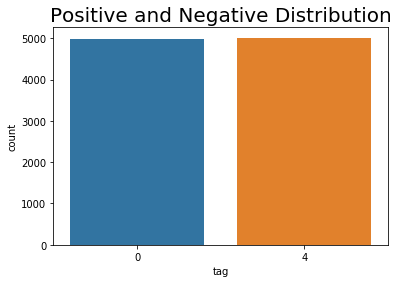

In [7]:
ax = sns.countplot(data = df , x = "tag")
plt.title('Positive and Negative Distribution', fontsize=20)


In [8]:
def clean_text(text):  
    pat1 = r'@[^ ]+'                   #@signs and value
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags and value
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip()

In [9]:
df["text"] = df["text"].apply(clean_text)

In [10]:
df["tag"] = df["tag"].apply(str) 

In [11]:
df = df[ ~(df["text"] =="")]

In [12]:
df.shape

(9980, 4)

In [13]:
  >>> import nltk
  #>>> nltk.download('wordnet')

In [14]:
lem = WordNetLemmatizer()

def tokenize_lem(sentence):
    outlist= []
    token = sentence.split()
    for tok in token:
        outlist.append(lem.lemmatize(tok))
    return " ".join(outlist)

In [15]:
df["text"] = df["text"].apply(tokenize_lem)

In [16]:
columns_titles = ["text","tag"]
df=df.reindex(columns=columns_titles)

In [17]:
df["tag"]  = df["tag"].replace("4","positive")
df["tag"]  = df["tag"].replace("0","negative")

In [18]:
#df.head()

In [19]:
pos_df = df[df['tag'] == 'positive']

In [20]:
neg_df = df[df['tag'] == 'negative']

In [21]:
pos_records = pos_df.to_records(index=False)
pos_result = list(pos_records)

In [22]:
pos_result

[('oh yeah and happy st anniversary rent', 'positive'),
 ('why thank you m tweetpea', 'positive'),
 ('have a great time', 'positive'),
 ('wow mdilla l salama sound like u had an amazing time', 'positive'),
 ('fair enough sleep well cutie', 'positive'),
 ('comment to previous tweet the car ill never buy unless i change my life in the most severe way', 'positive'),
 ('round rock donut are amazing wish i wa in that line lol', 'positive'),
 ('in art class drawing is actually not that bad', 'positive'),
 ('will defo visit next year though but i cant wait to be living at home again and going to greenwich uni', 'positive'),
 ('in love name my pinstripe short', 'positive'),
 ('loved the hangover', 'positive'),
 ('hush your lip do the helen keller and just talk with your hip', 'positive'),
 ('of course mister duhhh lol', 'positive'),
 ('still dont get of all songshe did that oneits so weird seein him do that after so many year tho', 'positive'),
 ('tinchy stryder ft ndubz number', 'positive'),


In [23]:
neg_records = neg_df.to_records(index=False)
neg_result = list(neg_records)

In [24]:
tweets = []

In [25]:
for (words, sentiment) in neg_result + pos_result:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    tweets.append((words_filtered, sentiment))

#test_tweets = lists_from_csv

def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words += words
    return all_words

all_words = get_words_in_tweets(tweets)

def get_word_features(wordlist):
    wordlist = FreqDist(wordlist)
    # word_features = wordlist.keys() # careful here
    word_features = [w for (w, c) in wordlist.most_common(2000)] #use most_common() if you want to select the most frequent words
    return word_features

word_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

training_set = [(extract_features(d), c) for (d,c) in tweets]

classifier = NaiveBayesClassifier.train(training_set)


In [26]:
classifier.show_most_informative_features(20)

Most Informative Features
      contains(headache) = True           negati : positi =     21.1 : 1.0
           contains(ugh) = True           negati : positi =     17.9 : 1.0
         contains(worst) = True           negati : positi =     15.7 : 1.0
          contains(poor) = True           negati : positi =     14.8 : 1.0
          contains(sick) = True           negati : positi =     14.1 : 1.0
        contains(throat) = True           negati : positi =     13.7 : 1.0
           contains(rip) = True           negati : positi =     13.7 : 1.0
          contains(dead) = True           negati : positi =     12.4 : 1.0
         contains(upset) = True           negati : positi =     12.4 : 1.0
       contains(welcome) = True           positi : negati =     12.4 : 1.0
         contains(thank) = True           positi : negati =     11.9 : 1.0
           contains(thx) = True           positi : negati =     11.0 : 1.0
           contains(sad) = True           negati : positi =     10.6 : 1.0

In [27]:
test_tweets = pd.read_csv('allTextContent.csv')

In [28]:
test_tweets.head()

,user_name,user_id,text
0,TwiMeta,56161646,Mac Studio's M1 Ultra Chip Outperforms on Comp...
1,Africanmind7,1273728531227447296,RT @iDropNews: Trace won an iPad Air (M1) from...
2,menter_latonia,1378412854223773706,"Check out Apple MacBook Pro 14.2"" M1 Pro Chip ..."
3,astro_peca,1298396509420093440,NOTHING is working on the M1 mac processor. Or...
4,jeffbenton78,780377304589488128,"RT @ForbesTech: Forget The New MacBook Pro, Ap..."


In [29]:
test_tweets_list = test_tweets['text'].tolist()

In [30]:
for t in test_tweets_list:
    # print "{0} : {1}".format(t, classifier.classify(extract_features(t.split())))
    print ("{0} : {1}".format(t, classifier.classify(extract_features([e.lower() for e in t.split() if len(e) >= 3]))))

Mac Studio's M1 Ultra Chip Outperforms on Computational Fluid Dynamics Benchmarks https://t.co/lZT6pYAMTB : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Check out Apple MacBook Pro 14.2" M1 Pro Chip 16GB 512GB Space Gray MKGP3LL/A 2021 Model by XanaduFashions on Store… https://t.co/r7ETzWNYbq : positive
NOTHING is working on the M1 mac processor. Or, to make it working, you have to manually fix things. I want a Linux machine. @Apple : negative
RT @ForbesTech: Forget The New MacBook Pro, Apple Has Something Better https://t.co/3z6WGYeBES https://t.co/eSRjxGznQr : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @joelvarty: PSA: to anyone trying to use the @elgato CamLink 4k on a MacBook with Apple Silicon/M1 chip.  If you’re having problems with… : negative
Ma

16" M1 Pro MacBook Pros available for up to $200 off MSRP at Amazon, free ship: https://t.co/rqTMAbjIiV : negative
14" and 16" M1 Apple MacBook Pros w/$50 off AppleCare+ at Expercom: https://t.co/kFaYKbSfYp : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
#ai #ml #artificialintelligence #machinelearning #datascience #bigdata #analytics #blockchain #tech #data… https://t.co/UDe7gRpxFQ : positive
However, as things evolve, my inability to just drop myself somewhere and be productive has started to become a not… https://t.co/otF0sQLGK1 : positive
"ad:' Apple 2021 MacBook Pro 16-inch M1 Max, 64GB, 2TB Excellent Condition - https://t.co/jX0RAquplm https://t.co/gDuVfnE9Q2 : positive
Oh God, Apple MacBook Pro 16” M1 has the best speaker EVAHHHHH !!! But I can’t afford it 😭😭😭 : negative
Mac Studio's M1 Ultra Chip Outperforms on Computational Fluid Dynamics Benchmarks - Slashdot htt

For any TLA+ fans out there, I'm running TLC (via toolbox) on a new M1 Max macbook pro. It's running through rosett… https://t.co/Yg7TQa4hRB : negative
RT @eddelbuettel: @ucfagls Yes, R Core / Simon provides this via the 'macbuilder' (using an M1 machine) at 

https://t.co/Ajk94dIkTd

#rsta… : positive
@DiabloImmortal Would the iPhone/iPad app run on an M1 Mac with keyboard and mouse support? I think you guys are do… https://t.co/1jpRq8aRfS : negative
RT @SlashPolygon: Moved from Unity 2020 to Unity 2021 LTS. Thanks for the support of Apple Silicon! Redesigned the lighting in Tavern Brawl… : positive
Apple MacBook Air 13 in. with M1 Chip 8-Core CPU and GPU 8GB RAM 512GB SSD. Only $1049 https://t.co/OtkdOIeEPf : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
13" MacBook Airs with Apple M1 CPUs on sale for $50 off MSRP at Simply Mac: https://t.co/wQW6dYxyUA : positive
@tanner

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @aurooba: @ElgatoSupport Although now I'm reading this review, is this because the Camlink can't work with the M1 Macs? I thought the @e… : positive
@BrianForAmerica From the system’s perspective, a 68020 with an added FPU and MMU is probably the same as a 68030 o… https://t.co/pioeCRRhgf : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
@The3DNinja @ThomasPasieka How is the support for the Mac, @The3DNinja ? Does it run native on Apple Silicon? And d… https://t.co/K9j39QyVEB : positive
“Qualcomm’s use of the #Nuvia-designed processor was specifically because the company is ‘going after the performan… https://t.co/z2DLVDI6Wz : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow t

@ForrestGump_ir Apple macbook with M1 processor : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
Apple's 12.9-inch iPad Pro M1 falls to a new all-time low price of $950: #artificialintelligence #iot MT:… https://t.co/YGNIxkagDI : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
Get a 13″ M1 MacBook Pro with 16GB of RAM today at Apple for up to $350 off MSRP. Details at… https://t.co/zaoIbJYS0S : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @dignifiedtrades: Frame 1: MacBook Pro Late 2020 | M1 || 13

RT @dignifiedtrades: Frame 1: MacBook Pro Late 2020 | M1 || 13 inches I| 8gb ram I| 256ssd I| Retina display Il Touch Bar and Touch ID | 20… : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
Very nice write up of a new data leakage mechanism on modern Apple silicon, also enjoyed the @AsahiLinux reference… https://t.co/t9ddmBLZ7i : negative
“Alla that body that you came with… but where are you mentally?”  https://t.co/xW4ENRXOrn : negative
i am getting closer to compiling an xbox 360 binary on an m1 mac there are only days remaining https://t.co/fG0nxdFF1b : negative
Qualcomm’s answer to Apple’s M1 chip is coming in late 2023 https://t.co/VyOcV5ekDd : positive
Qualcomm will use Apple Silicon rival chips PCs by late 2023 https://t.co/XNX6K5EwoG : positive
Watch apple call their next iPhone soc "M1 mini" : negative
Qualcomm will use Apple Silicon rival chips PCs by late 2023 ht

RT @TheCGNerd: No doubt a fringe case, but I'm rendering a scene in #b3d Cycles where a bottom of the line M1 Mac Mini is churning through… : negative
RT @wccftech: Apple’s M1 Ultra Uses TSMC’s ‘InFO_LI’ Packaging Method, Enabling Lower Cost in Mass Producing the Cu… https://t.co/4UNosPz4qU : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @iDownloadBlog: Nvidia’s GeForce Now cloud gaming service gains native Apple silicon support https://t.co/n95Vo2ZDbK https://t.co/X4ps25… : positive
512 GB is still my sweet-spot for modern computers, and I'm glad I got the 512 GB version of the M1 Mac Mini.
Howev… https://t.co/Ur1698UOkG : positive
The M1 chip and beyond: Everything you need to know about Apple’s homegrown Mac chips Macs have undergone a big cha… https://t.co/2vWqJvKrKx : positive
Nvidia Updating GeForce NOW With Native Support for Apple Silicon Macs https://t.co/Akj7j

RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @SmartykitE: Great post by @kenshirriff on Apple-1's video memory – right to the silicon! Memory used 2504V shift registers instead of D… : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @DriftingRuby: Apple M1 machines are slow at emulating amd64 to build docker images. If you have a spare Intel/AMD computer laying aroun… : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
MacBook Air 13.3″ Laptop – Apple M1 chip – 8GB Memory – 256GB SSD (Latest Model) – Space

👉 Regis… : negative
Apple store workers at a location in Atlanta have become the first to file for a union election, setting up a battl… https://t.co/2bhJiA1XkC : positive
qualcomm: Here’s when Qualcomm’s answer to Apple’s M1 processor will arrive https://t.co/2YhCKWsFmU : positive
testing OBS on the m1 pro rn

i might actually be able to replace my dual pc setup w a little apple boi : positive
PC MAG: Apple Mac Studio (M1 Ultra) Review
https://t.co/W7yf6j3RiX : positive
qualcomm: Here is when Qualcomm’s reply to Apple’s M1 processor will arrive – Instances of India https://t.co/A92XYYmn6q : positive
@Affansyed321 Did you face any issues with the bluetooth of Mac mini M1? : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
Nyhe

RT @soundtoys: ICYMI we just released  version 5.3.7 with native Apple Silicon support for Audio Units and VST2. Here's all the info: https… : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@jakethebaa I would recommend that you upgrade to an iPad Pro M1 chip, in combo with a Mac mini or something like t… https://t.co/dQGKkb1C7I : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpad. Also work… : positive
This is the only Mac benchmark that matters. The M1 Ultra Mac Studio absolutely destroys

@cybersecmeg @Apple I was threatened with law enforcement one time because I questioned why I needed an appointment… https://t.co/lmkor591Rc : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
Silicon Earphone Case with Charm for Airpods #appleaccessories #apple https://t.co/fWOzJhXxmb https://t.co/9rLBdBVS5u : positive
@YangCLiu @MetaverseGG Sheeesh, the new M1 max Mac chips wouldn't hold a candle to these : positive
Apple MacBook Pro w/TouchBar 13.3" M1 16GB 512GB SSD (Myda2ll/a)(Space Gray) https://t.co/j7HrrI01hc https://t.co/1wE2Mc77zl : positive
Back in stock: save $200 on Apple's M1 Max 16-inch MacBook Pro with 64GB RAM, 1TB SSD https://t.co/fRnl4CRVAu $AAPL https://t.co/NlZz2x67yA : positive
RT @dkohlbre: We found a way

-Sent from my M… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
Qualcomm says its Apple Silicon rival chips will be in PCs by late 2023 https://t.co/wtR8Fbruc3 $AAPL https://t.co/3jAUxltnzB : positive
👍 on @YouTube: How a CPU Works in 100 Seconds // Apple Silicon M1 vs Intel i9 https://t.co/w3FVV2LzJr : positive
hi. so i have a question for those that have the mixamp from astro for a PS5 and are running a mac mini m1 chip set… https://t.co/ngObZphCjw : positive
RT @TWiStartups: Why @jason thinks the end of Silicon Valley's startup monopoly is good for everyone (including SV!)

with @mpesce on @twis… : positive
RT @mjtsai: Which Devices Should You Boot Your M1 Mac From?: https://t.co/6PkDEWf8ci #mjtsaiblog : positive
RT @Ex

@NBCSWarriors T mac doesn’t know ball : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dkohlbre: We found that the Apple A14 and M1 family contain a prefetcher that targets an Array-of-Pointers (AoP) access pattern. Specif… : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
Apple CEO: Silicon shortages and C-19 lockdowns to hurt sales by up to $8 billion https://t.co/Mn5VC7WmZW https://t.co/fR3k6bG7bq : negative
Any other #Mac people have popping speakers in their M1 Pro laptops? Can’t make it happen on demand and it’s making me crazy. : positive
Apple MacBook Air with Apple M1 Chip (13-inch, 16GB RAM, 256GB SS

RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpad. Also work… : positive
Mac mini (M1/256GB) on sale for $649 at Simply Mac, $50 off MSRP: https://t.co/BbaydZoWP9 : positive
@HughesMichi When you get your new Mac, Mike, I recommend following Howard @howardnoakley for in-depth knowledge ab… https://t.co/LWeCrt9uAH : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @koto_san_kana: The latest release of #rakulang IDE Comma is now available, both for subscribers as well as the free Comma Community edi… : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
#technology Nvidia Updating GeForce NOW With Native Support for Apple Silicon Macs https://t.co/1WwVHujbJ3 : positive
@scottturneruon @YouT

@VadimYuryev I'm sorry if this is "contrarian" lol but I don't think Apple lost any nerve center for silicon at all… https://t.co/RSz0UgfVud : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @TWiStartups: Why @jason thinks the end of Silicon Valley's startup monopoly is good for everyone (including SV!)

with @mpesce on @twis… : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
Qualcomm CEO Suggests Company’s ARM-Based Apple M1 Rival Could Be Delayed https://t.co/hfst1ACjYy : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @koto_san_kana: The latest release of #rakulang IDE Comma is now available, both for subscribers as well as the free Comma Commu

RT @appleinsider: Nuvia Arm processors from Qualcomm are now said to be on track for shipping in PCs by late 2023, making the company behin… : negative
GeForce Now adds Apple Silicon support, making it sort of possible to game on a Mac https://t.co/STdeKE6kem #metabloks : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @loretoparisi: How to detect if cpu architecture is #Apple Silicon or #Intel in #NodeJS #JavaScript https://t.co/EecHJXMKEc : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
How to detect if cpu architecture is #Apple Silicon or #Intel in #NodeJS #JavaScript https://t.co/EecHJXMKEc : positive
Wait

RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
GeForce Now adds Apple Silicon support, making it sort of possible to game on a Mac  https://t.co/2HueU2Ojpi : positive
Me looking at all the new Apple products with the M1 chip in em. https://t.co/l6ykRS8aem : positive
@ghost_motley @TheAtlasRises @uzzi38 @SWenerski @phatal187 @JamesDSneed Wha? There's no redeeming performance benef… https://t.co/fcx7zyfAn4 : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
Qualcomm confirms Apple M1-killing Windows 11 laptops are coming  but is it too late? - TechRadar https://t.co/rihU7qkOnD : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
@bchesky Tim Cook @tim_cook should lear

If you know what you’re going to do, it is a simple decision. If you’… https://t.co/9GlGlZUGl7 : positive
RT @TheRegister: Apple CEO: Silicon shortages and C-19 lockdowns to hurt sales by up to $8 billion https://t.co/zNsJ8wpmE8 : negative
RT @wefoundercircle: Pirates of Silicon Valley:
This was a made-for-TV movie released in 1999 that covers the early days of the country's l… : positive
RT @undisputed007: Qualcomm's M1 Rival to Be Available in PCs by Late 2023 https://t.co/ePENpiQ0EL #Apple #Qualcomm #Computing #TechnologyN… : negative
➔ NEWS ➔ GeForce NOW Update Adds 14 New Games And Apple M1 Processor Native Support: https://t.co/Bm68idtB8K https://t.co/V96W1kHX2i : negative
RT @wefoundercircle: Pirates of Silicon Valley:
This was a made-for-TV movie released in 1999 that covers the early days of the country's l… : positive
Is the M1 mac good for PS and AE? : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buyin

No doubt a fringe case, but I'm rendering a scene in #b3d Cycles where a bottom of the line M1 Mac Mini is churning… https://t.co/0yXnSizqRT : negative
RT @iCave_Dave: Today at 1300 UK time
Apple M2 Generation performance Vs M1 A PAINFULLY Detailed discussion https://t.co/AFyysPNUEW via @Yo… : positive
Currently the Official Confluent Docker Images are only made available for linux/amd64 architecture. For our team t… https://t.co/45HWYK1hDq : negative
Apple’s new M1 Ultra aims to beat Nvidia’s RTX 3090 https://t.co/lQfQlXwL0y : positive
#RaviVisvesvarayaSharadaPrasad  https://t.co/oK4Txj6gJ4 Best Mac Mini Deals: Save $40 on the 512GB M1 Mac Mini     - CNET : positive
Anyone have graphpad prism version 9 (cracked) for Mac M1 ? : positive
@haerwu @Qualcomm It looks like the senior management have no idea what is going on in the arm hardware side.  
1.… https://t.co/btWtbmL6f1 : negative
Apple CEO: Silicon shortages and C-19 lockdowns to hurt sales by up to $8 billion (webmaster@theregist

Episode w/ @xeetechcare discussing doing YouTube while Travelling, Apple M1 MacBooks, Exynos vs S… : positive
@shwestrick yeah, the apple machines are expensive, but have ridiculous value. I think the M1 air is one of the bes… https://t.co/jdP42sEBjn : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
Got a new Apple Silicon MBP from work. It runs the six full cores of antivirus SO FAST! : positive
@ronydanzel @Anghwrd @Hero_NFT_

I even reinstalled the 32bit vers… https://t.co/TsdFvCQrsH : positive
Apple M2 Generation performance Vs M1   A PAINFULLY Detailed discussion https://t.co/AFyysPNUEW via @YouTube : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
need a new mbp workhorse but likely m2 chips coming q3. waiting seems smart to buy a discounted m1 or commit to m2… https://t.co/O5iJi2POnM : negative
RT @quantovox: Spatializer's iOS Audio Unit can now be installed on Apple Silicon (M1) Macs.
https://t.co/ZJEfRvpvAY

#auv3 #logicpro #Gara… : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products ov

@stevekovach @CNBCTechCheck Looks like the investment in the M1 SoC is paying off. Mac Studio 👍 : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Love the M1 chipset. I’ve used my external display a lot less since switching, and no longer feel tethered to my de… https://t.co/qOYDPlquHA : negative
@dene_schunck Yes and I'm one of them! I myself hate Apple but what they did with the M1 and Macs really deserve an… https://t.co/6SUDJUfTAB : positive
"In today's world, it's not really possible for us to have buffer on silicon. And so today, silicon rolls off the f… https://t.co/DTDnfkptKW : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and

Mac Studio M1 Ultra Edit Bay &amp; Desk Setup Tour | Content Producer for JL... https://t.co/ahlYGk3XoB via @YouTube : positive
Today at 1300 UK time
Apple M2 Generation performance Vs M1 A PAINFULLY Detailed discussion https://t.co/AFyysPNUEW… https://t.co/UT2hKwokJ2 : positive
Apple M1 Macs Now Have Native Support of Nvidia GeForce Now App https://t.co/81PR3c1TlG #Gaming #News #AppleM1Mac… https://t.co/hRJBWZ8aew : positive
✨Apple M1 Macs Now Have Native Support of Nvidia GeForce Now App

🔭https://t.co/oqHhnMNfJP - : positive
Air vs Pro with M1, changing the region of the Apple ID, the price of MagSafe Duo … The week of the Infinite Loop p… https://t.co/ileb82iJtj : positive
Avoid Tears Setting Up Apache NiFi on Macbook M1/Apple Silicon (aarch64) Systems. by Shammah Emma-adamah https://t.co/vZ6ABU9Qoz : positive
RT @dhanukaprr: Adobe After Effects Updated With Native Apple Silicon Support, Up to 3x Faster Speeds Than High-End iMac Pro

https://t.co/… : positive
So disappointed in @ap

Link: 2022 Mac Studio (20-core M1 U… https://t.co/DctZb273bq : positive
RT @TWiStartups: Why @jason thinks the end of Silicon Valley's startup monopoly is good for everyone (including SV!)

with @mpesce on @twis… : positive
RT @TWiStartups: Why @jason thinks the end of Silicon Valley's startup monopoly is good for everyone (including SV!)

with @mpesce on @twis… : positive
CAT HACKER: 2022 Mac Studio (20-core M1 Ultra) Review https://t.co/iDvgruwR0C : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
@ghost_motley @davidbepo Don't forget that Apple's M1 lineup is 100% APU. I know you're referring to pcs but the wa… https://t.co/K7xSgaQKIn : positive
Brand New 2021 Apple iPad M1 chip 11inch
128gb WiFi MK 1,179,000
128gb WiFi+Cellular MK 1,229,000
256gb WiFi MK 1,2… https://t.co/N4j6ebFUMQ : positive
2022 Mac Studio (20-core M1 Ultra) Review #Chatbot #chatbots via https://t.co/o

@ANGdjs Hell yeah M1 Mac 1TB storage, super fast and smooth, no overheating too like the older MacBooks : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpad. Also work… : positive
Where can I get Apple MacBook Pro 16 inch M1 Max 10-Core CPU &amp; 32-Core GPU 64GB/8TB for R1500 ? : negative
Which SSDs can you boot your M1 Mac from? Do hard disks work too? https://t.co/Z2pt3mfKAR : negative
RT @growing_daniel: You awake in a damp cell, what feels like a rough concrete floor, sounds of scuttling. How long have you been out?

"IN… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @MacRumors: Nvidia Updating GeForce NOW With Native Support fo

Maybe it's the new Mac feature Un… https://t.co/bIBYVgzcm5 : positive
Super Hot Deal! Get it for only $2249.00! Compare: BrandsMart USA ($2448.00) | eBay ($2500.00) | Abt Electronics ($… https://t.co/v09k0v7yLz : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Thoughts on the 2022 Mac Pro and how it can be differentiated. What if they go with pluggable processor cards so ex… https://t.co/s0ZTRdpmcr : positive
New top story on Hacker News: 2022 Mac Studio (20-core M1 Ultra) Review https://t.co/TOn0xQCQLJ : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @smakelainen: In an age when Moore's Law is experiencing a s

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @ExpressPi: 🍏 Apple iMac 24" M1 7-Core GPU 256gb 8-Core CPU. In stock at ExpressPi-iGadgets Store by July 28, 2022.

👉 Register @ https:… : negative
@ManiacPersian Apple is bad at software so doesn't have eGPU drivers for their M1 CPU. https://t.co/swLUZLIeDr : negative
@kitesthlm @JU4NMEND0Z4 @DanielEndy @paulg The M1 chip supports two displays, with the portable machines that inclu… https://t.co/Rpboox3VyJ : positive
@MrMorrisGames does it work on mac M1? : negative
RT @Tech__Deals: SAVE $150.00 !!! 

2021

I JUST RENDERED THIS 1 HR 22 MIN E… : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @FTCUTD: Y'ALL.
Y'AAAAAAALLLLLL.

Get you an M1 Mac. I know the M2 is coming soon enough, but damn. 

I JUST RENDERED THIS 1 HR 22 MIN E… : positive
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : positive
Y'ALL.
Y'AAAAAAALLLLLL.

Get you an M1 Mac. I know the M2 is coming soon enough, but damn. 

I JUST RENDERED THIS 1… https://t.co/Xt2BIKpESA : positive
@elonmusk Next buy must be Google or Apple, so they can't shut you down. Silicon Valley has been entirely dominated… https://t.co/ra1X8LzgvN : positive
I wish the 12" MacBook was still around—l

@FishiesTiredTV @ZoxoFN Try finding them on Amazon https://t.co/Kl33UTJuas : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
🍏 Apple iMac 24" M1 7-Core GPU 256gb 8-Core CPU. In stock at ExpressPi-iGadgets Store by July 28, 2022.

👉 Register… https://t.co/j4IhVuqjon : negative
13" M1 MacBook Airs (8-Core CPU/8-Core GPU) on sale for $1199 at Simply Mac, $50 off Apple's MSRP: https://t.co/qEnKJZOQRC : positive
@PeteGKing @Apple I ordered a 16” M1 Pro. It got delayed once, I’m starting to suspect it gets delayed again becaus… https://t.co/JK2v6n879d : negative
M1 Mac minis on sale for up to $30 off MSRP at Amazon: https://t.co/0EO7QUCDuF : positive
@jasonology @DigitalTrends I saw an article this morning saying Qualcomm has bough

@Jbams01 Apple's been killing it with innovation.  The M1 series of processors with unparalleled energy efficiency,… https://t.co/bNlEyCzgkM : positive
@Youkilluandme @ZoxoFN This https://t.co/Kl33UTJuas : positive
@ZoxoFN Have you seen this one https://t.co/Kl33UTJuas : positive
@Deltedz @ZoxoFN Here you go https://t.co/Kl33UTJuas : positive
RT @Fastsaller: @FishiesTiredTV @ZoxoFN Try finding them on Amazon https://t.co/Kl33UTJuas : negative
@Fan3ss @ZoxoFN Here's the link to it https://t.co/Kl33UTJuas : positive
@FishiesTiredTV @ZoxoFN Try finding them on Amazon https://t.co/Kl33UTJuas : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
🍏 Apple iMac 24" M1 7-Core GPU 256gb 8-Core CPU. In stock at ExpressPi-iGadgets Store by J

Since the launch of the first Apple silicon Macs in November 2020, Apple has continued to see strong growth in Mac… https://t.co/PT8GBA2hxh : negative
@intoPIX @NABShow @Nikon When will TicoRAW SDK be available for Apple Silicon (M1) CPU and GPU? : negative
So I did a thing and got a great deal on a Mac Book Pro M1 1tb SSD 16gig for 750$ basically brand new ayeeee. Busin… https://t.co/p5yz95zCsX : positive
Apple restocks maxed-out 13" M1 MacBook Airs (16GB RAM/1TB SSD) for $1399, Certified Refurbished, $250 off MSRP -… https://t.co/NxhrIiWrPG : negative
@SamiFathi_ Imagine S22 plus with Google Android 12 powered by Apple A15 bionic.

Imagine Dell XPS running on MacOS… https://t.co/qlB8cVmp9m : negative
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : positive
Mac M1, Pillars of Eternity (Rosetta) ~60 fps https://t.co/asAeyTkCIZ : positive
RT @dougboneparth: Apple makes the same products over a

RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : positive
SYNERLOGIC Mac OS ( Monterey/Big Sur/Catalina/Mojave) Keyboard Shortcuts, M1+Int...👉 https://t.co/TJMJZgYfKT https://t.co/vvZPHMCcBc : positive
13" M1 Apple MacBook Pro/256GB for only $1099, Certified Refurbished, at Apple. $200 off! Free ship, 1-yr warranty: https://t.co/2YJ2m8l4OE : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : positive
RT @xdadevelopers: Nvidia GeForce Now app is now native on Apple M1 https://t.co/478C2XuvJb : negative
RT @appleinsider: .@Nvidia has announced that its GeForce Now cloud gaming service now features native support for #AppleSilicon Macs. http… : pos

Supply constraints Q, Apple says:

COVID-related disruptions, and industry-wide silicon shortages. But, Cook adds,… https://t.co/oXqZMvS9UZ : negative
Behind Apple's quarter, it says : 

- supply chain troubles clipped sales of iPhone and Mac

- Mac has posted best… https://t.co/jb7px6d1Ur : positive
@joshhunt I compare my m1 mac to my roommates Intel one that gets warm running safari and I wonder how the hell app… https://t.co/XTg5H1n2ii : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @MKlaehne: $AAPL continues to grow services up 17%, iPhone up 5%, Mac (Apple silicon!) up 15%, and wearables, home, and accessories grow… : negative
RT @solidstatelogic: Introducing SSL 360° V1.3 update:

SSL 360° V1.3 adds new DAW Transport functionality to UF8, UC1 and the Plug-in Mixe… : positive
Mac mini (M1/512GB) on sale for $849 at Simply Mac, $50 off MSRP: https://t.co/FkBmEHklO8 

NVIDIA adds native M1 Mac support to the GeForce Now app https://t.co/LtlRlsXVo4 : positive
RT @MacObserver: Nvidia GeForce Now App Updated to Provide Native Apple M1 Mac Support https://t.co/7qdz9WkH6V : positive
Nvidia’s GeForce Now cloud gaming service gains native Apple silicon support https://t.co/n95Vo2ZDbK https://t.co/X4ps25wIEw : positive
NVIDIA adds native M1 Mac support to the GeForce Now app https://t.co/zWVZhrR7HD : positive
@je_mc2 It’s the stress of using a MacBook. And this is even M1 o because processor of normal Mac can’t handle PowerBI at all. : negative
NVIDIA adds native M1 Mac support to the GeForce Now app: The GeForce Now macOS app should run more smoothly for ma… https://t.co/6lKMwNmBxh : positive
NVIDIA adds native M1 Mac support to the GeForce Now app
https://t.co/KxxFqIOuXG
The GeForce Now macOS app should r… https://t.co/NWAchs4gcP : positive
🤓🤔👍 #knownews #tech #technews #Technology NVIDIA adds native M1 Mac support to the GeForce Now app The GeForce Now h

RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power. : positive
am i actually gonna have to write my own driver for wireless xbox 360 controllers on an m1 mac : positive
RT @OTG_WCat: 110 Watt Starlink Off The Grid solar stake pool using 3 Mac M1 Mini natively booting Arch Linux. 
Looking for delegation.
WMT… : positive
RT @BitcoinMerges: Merged PR from Hennadii Stepanov: build Fix macOS Apple M1 build with miniupnpc and libnatpmp Again  https://t.co/saQdRS… : negative
New 24" M1 iMacs on sale for up to $100 off MSRP, starting at $1199, at #Amazon with free shipping: https://t.co/yqcG2DOqxH : positive
Merged PR from Hennadii Stepanov: build Fix macOS Apple M1 build with miniupnpc and libnatpmp Again  https://t.co/saQdRSzHI9 : negative
@ImGonzaloCampos @saradietschy It does. You might wanna look into replacing your Intel apps with Apple Silicon bina… https://t.co/T4uii2A8De : positive
RT @daringfireb

RT @StockMKTNewz: Nvidia $NVDA announced that its GeForce Now cloud gaming service now features native support for Apple Silicon Macs $AAPL… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : positive
No. It has been 534 days since the Mac Mini was updated with the M1 chip on November 10, 2020. Prior to that, it ha… https://t.co/x3EqNKS3p3 : negative
@brianstucki @MacStadium M1 Ultra and 16" screens are all produced in Beijing that is locked down, so Apple is real… https://t.co/vTQMD1hgDv : negative
#TBThursday - Current Apple MBPs have up to 20 hr. battery life. The jump from 10 to 20 hrs. occurred with the intr… https://t.co/5E5UMieAJ7 : negative
The new Mac Studio with M1 Max Chip in Stock Now plus the New 27" Studio Display
https:/

As the author projects, I suspect the performance of the Mac Pro with its M1 Double Super Mega Ultra Supreme will a… https://t.co/U3MpQS4bl6 : positive
13" M1 MacBook Air (8-Core CPU/7-Core GPU/256GB SSD) for only $849 at Apple, refurbished. Save $150! Free ship, 1-y… https://t.co/6k1SxwFNsH : positive
RT @IEEEFoundation: #Apple Founder Steve Wozniak is known for being a Silicon Valley icon, but did you know he's also a @IEEE_EtaKappaNu me… : negative
RT @Apple: Light, bright and full of might. The new supercharged iPad Air with the Apple M1 chip. : positive
why's Bluetooth "Advanced" removed from System Preferences in Monterrey?
‍
"Allow Bluetooth devices to wake this co… https://t.co/Fqdma8Z36x : negative
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun a

Apple Silicon: What IT Pros Should Know About the M1 Chip and Beyond https://t.co/cZ8vzUZ4Gd : positive
@BramptonBruin I think the M1 Mac mini is all you need : positive
Nvidia Updating GeForce NOW With Native Support for Apple Silicon Macs https://t.co/pF4cGlbwtG : positive
RT @OracleNYSE: $NVDA $AAPL 
'Nvidia GeForce Now updated with native support for Apple Silicon Macs' -Apple Insider Report : positive
Get £75 off Apple’s M1 Mac mini (2020) with Amazon’s listing https://t.co/tXbZMiCVUK : positive
@apple your chip naming scheme is terrible... try reading the following out loud

I have an M1 Max Macbook and a Ma… https://t.co/u6LyBEUbjT : positive
RT @appleinsider: .@Nvidia has announced that its GeForce Now cloud gaming service now features native support for #AppleSilicon Macs. http… : positive
RT @appleinsider: .@Nvidia has announced that its GeForce Now cloud gaming service now features native support for #AppleSilicon Macs. http… : positive
RT @denvercoder: I just bought a very 

Nvidia Updating GeForce NOW With Native Support for Apple Silicon Macs #apple #for #geforce #mac8217s #native #now… https://t.co/eI94GsgZdq : positive
Nvidia Updating GeForce NOW With Native Support for Apple Silicon Macs #apple #for #geforce #mac8217s #native #now… https://t.co/wi77MXhqyK : positive
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : positive
RT @MacRumors: Nvidia Updating GeForce NOW With Native Support for Apple Silicon Macs https://t.co/ydfdSP5cgH by @rsgnl https://t.co/daEqa4… : positive
@DasSurma Ever updated your M1 Mac? How is it possible i never heard it takes over 20 minutes?!? : positive
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : positive
RT @official_umoh: Putting an 8GB RAM on an M1 is top dumbest things Apple ever did. SMH : negative
RT @indianmotivati1: Nvidia Updati

The program will provide those capable of at-… https://t.co/9gttnXdQGI : negative
@FamilyLawJack Have new M1 iMac and M1 Mac mini, then intel MacBook Pro. Obviously not quite like for like comparis… https://t.co/5An2fCUtJD : positive
Apple fix your digital outputs on your M1 Macbooks challenge 2020, 2021, 2022... : negative
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : positive
RT @blakespot: M1 Pro work laptop: I noticed one of my oft' needed menu icons is hidden by "the notch" unless I scale to larger res. Is thi… : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
@TechHighest @Welches @jessekautzphoto @saradietschy What IDEs are you looking at? Xcode compile times are great on… https://t.co/VNRIGC20OW : positive
@nhaffie Hi Nick,

We have a rough timeline here: https://t.co/RHT

Two years after I purchased my Mac Mini M1 - The “geniuses” at Apple have still not fixed my second monitor from do… https://t.co/ZT8bv00MNl : negative
RT @9to5mac: Nvidia GeForce Now app adds native support for Apple M1 Macs just in time for Lost Ark arrival https://t.co/aiWRJUuUSs by @nex… : negative
I'm so excited about my new role, even more so when I surprisingly got an email saying:
&gt; Good news! Your employee… https://t.co/EKyqwO0cvt : positive
My relatively new M1 MacBook Air has so many bugs at the moment that I'm considering ditching Mac altogether. MS Of… https://t.co/qSSgXxBEXg : negative
RT @iDropNews: Bridget won a brand new Apple M1 MacBook Pro and you could too! Follow the link and earn your chances to win a MacBook Pro a… : positive
@jsgolub Won't matter with an Apple M1 series. 🙃 : positive
RT @techwontsaveus: This week @mollytaft joins @parismarx to discuss why Silicon Valley is getting in on CO2 removal technologies.

In this… : negative
RT @9to5mac: Nvidia GeForc

Apple’s M1 Ultra Uses TSMC’s ‘InFO_LI’ Packaging Method, Enabling Lower Cost in Mass Producing the Custom SoC https://t.co/3rqIc0YJou : negative
Apple’s M1 Ultra Uses TSMC’s ‘InFO_LI’ Packaging Method, Enabling Lower Cost in Mass Producing the Custom SoC… https://t.co/hOWomXYI87 : negative
You may have heard about Apple's new M1 chips, but do you know what makes them so special 💻?
⁠
Read our latest blog… https://t.co/15kpHfvoAj : positive
@PlayOverwatch I know this is far from a priority, but a Mac Apple Silicon version of OW would be so heaven sent fo… https://t.co/Vt3iFugLVz : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
New reply to “Voice Dream Reader on M1 Mac” (Forum Topic) https://t.co/dKA0gX1EMq : positive
RT @Blackmagic_News: New Desktop Video 12.3 Update! Adds the ability to calculate performance of the Blackmagic RAW and H.265 formats on Di… : positive
@C0axx I

[Laptop] WTB: 1-100, Apple, MacBook Pro, Air M1, A/B, Offer EUR https://t.co/hi9FAtXP2O Link to the offer ↓ #WTB… https://t.co/uiXE94XR14 : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
Here's the update discussion thread for TotalFinder 1.14.1 (for both Apple Silicon and Intel):… https://t.co/m3YI6sCNfa : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @ExpressPi: 🍏 Apple MacBook Pro 16" M1 Pro 10CPU-16GPU-16GB (Late 2021). In stock at ExpressPi-iGadgets Store by July 28, 2022.

👉 Regis… : negative
@wsvincent1 Reading your book and employing Docker has enabled me to run my Oracle-using Django app on my M1 Mac. O… https://t.co/333dQerHsd : positive
RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a b

RT @techyped: Sudden urge to flex my Apple silicon mac in this building!! https://t.co/2CmI6Tt1PR : negative
@MattOfRWR I get it, looks real good in a slideshow, and no one but people like me would fault them for it, hell we… https://t.co/5D0DhKlEN8 : negative
RT @Tech__Deals: SAVE $250.00 !!! 

2021 Apple MacBook Pro (16-inch, Apple M1 Pro chip with 10‑core CPU and 16‑core GPU, 16GB RAM, 512GB SS… : positive
Apple Opens ‘Self Service Repair’ Online Store https://t.co/iVDBpScyqO https://t.co/LwqGZMXcnP : positive
@ICMdoc @Mumonamission89 @BellaRoscetti I was off Apple kit for a while because of the butterfly keyboard fiasco. W… https://t.co/XEFBfjbDWZ : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power. : positive
SAVE $250.00 !!! 

2021 Apple MacBook Pro (16-inch, Apple M1 Pro chip with 10‑core CPU and 16‑core GPU, 16GB RAM, 5… https://t.co/QcUENZxDBn : positive
RT @merchbanme: WTS LFB P

@Supersume @HabariTech @patrickpotter_1 The design of a chip has a far greater impact on its performance than the m… https://t.co/dHqbJyqgAJ : positive
RT @Jim_Salmons: To my #DigitalHumanities &amp; #AI/#ML folk: TY &amp; HT 🙏🎩 to @thecaffeinedev! Your article on installing #TensorFlow on #M1 #iMa… : positive
@strawberrikgs i’ve been wearing an apple watch and fitbit for years now! main tips are, wash under the band often… https://t.co/4rioRMXNXQ : negative
RT @Icon_Gadgets: Open Box MacBook Pro M1 Chip Sold 

Brand New Airpod Pro Sold 

Brand New iPad Air 4 + Apple Pencil 2 Sold 

iPhone X Sol… : negative
RT @Jim_Salmons: To my #DigitalHumanities &amp; #AI/#ML folk: TY &amp; HT 🙏🎩 to @thecaffeinedev! Your article on installing #TensorFlow on #M1 #iMa… : positive
To my #DigitalHumanities &amp; #AI/#ML folk: TY &amp; HT 🙏🎩 to @thecaffeinedev! Your article on installing #TensorFlow on… https://t.co/WAa7MTkb3g : positive
📈 APPLE M1 |
SoC solutions reshuffle the cards - System Plus Consul

2020 Apple MacBook Pro with Apple M1 Chip (13-inch, 8GB RAM, 256GB SSD Storage) – Silver https://t.co/ZLqyTASnSa : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@thefarseeker I used one for a couple years, it's still sitting here on the floor of my office.

Apple Silicon has… https://t.co/CjaU22Cnum : negative
How Apple’s Monster M1 Ultra Chip Keeps Moore’s Law Alive https://t.co/cc5eaEsBuS  #TechJunkieNews #TechJunkieNews… https://t.co/yDClvgndXT : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Steinberg Nuendo 12 is here and Apple Silicon native https://t.co/BAopyZMWsB https://t.co/Jp82XX0LXC : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
My Mac

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
13" M1 MacBook Airs (8-Core CPU/8-Core GPU) on sale for $1199 at Simply Mac, $50 off Apple's MSRP: https://t.co/i5uasBtyYc : positive
@theramalmedia Definitely. Best part about Apple ever. Besides the Mac books and the M1 Chip. : positive
My M1 Mac mini is officially a year old today ! :D it’s a whole work horse, I wouldn’t trade it for anything in the world— : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Save $250 on the la

The M1 MacBook Air is still a phenomenal computer. #MacBook #apple : negative
Doing my very first @Apple M1 MacBook Revive.  Hopefully I can get back in my OS! #MacAdmin #WednesdayVibes… https://t.co/ouU42NJLvB : negative
RT @vitalethomas: Building a @springboot native image on Apple M1? You can now do that with @graalvm 22.1, which introduced support for App… : positive
13" M1 Apple MacBook Pro/512GB for only $1269, Certified Refurbished, at Apple. $230 off! Free ship, 1-yr warranty: https://t.co/U3g7RVOMFs : positive
Save $250 on the latest 16-inch MacBook Pro with Apple’s M1 Pro chip https://t.co/vqK6CZKtqp : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Bridget won a brand new Apple M1 MacBook Pro and you could too! Follow the link and earn your chances to win a MacBook Pro a… : positive
Mobile editing station ft Mac Mini M1 https://t.co/OrYFI6kfKz : pos

"some people are mysterious Apple haters" @The__Taybor @nanopore . Catching up on recorded videos and the resoundin… https://t.co/7HhTO7gN12 : negative
Apple debuts Self Service Repair in the US for iPhone 12, iPhone 13, and new iPhone SE models, and plans to expand… https://t.co/1NmVjdDqXD : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @vitalethomas: Building a @springboot native image on Apple M1? You can now do that with @graalvm 22.1, which introduced support for App… : positive
RT @Apple: Introducing the all new iPad Air. Available in five stunning colours and supercharged by the Apple M1 chip. #iPadAir : negative
@Pat_Cormick I have never been able to successfully scan 120 using vuescan! I use it for 35mm though. And epson sca… https://t.co/3upFxKBVS0 : negative
RT @Pocketnow: Save $250 on the latest 16-inch MacBook Pro with Apple’s M1 Pro chip https://t.co/vqK6C

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Bridget won a brand new Apple M1 MacBook Pro and you could too! Follow the link and earn your chances to win a MacBook Pro a… : positive
@sarahhbickerton Every day I am impressed by my m1 MacBook Air (base model) especially running Logic Pro, browser,… https://t.co/MvvqXDO9Jo : negative
Twitter is a financial mess. Here’s why Elon Musk and Silicon Valley do not care - The Globe and Mail https://t.co/s8skql9s4S : negative
So ... native #astcenc builds are now 25% faster on Apple silicon. Enjoy =) : positive
RT @iDropNews: Tr

Me using my M1 mac at work https://t.co/ZQAEiLX0mK : positive
RT @vitalethomas: Building a @springboot native image on Apple M1? You can now do that with @graalvm 22.1, which introduced support for App… : positive
@mewvore Is that gonna be handed out at PayPal Park? Or perhaps Apple St.
Maybe Motherboard Ln.?

(the joke is that… https://t.co/tJVNMbEwUc : negative
Now I would have to go into 20 services and add wait-for-it, hopefully get a review, get it accepted to be able to… https://t.co/NFHrr3JX59 : positive
@shahfaesal Think you @shahfaesal are doing good.Strive relentlessly 24x7 to  make Jammu &amp; Kashmir a haven of Apple… https://t.co/509dwA26xc : positive
Why didn't they add a wait-for-it straight into docker-compose ? I have to start 20 services which start at the sam… https://t.co/d8AVqsRtI7 : negative
@HYPERCHARGEGAME Is it possible to play it as cross-platform between Windows and Mac M1 ?🤔 : positive
RT @9to5toys: Apple's 12.9-inch M1 iPad Pro now up to $399 off with new a

Offer! The Mac mini M1 at the best price https://t.co/zJbCWnAFmk : positive
Deals: Mac Book Air – with Apple’s acclaimed M1 chip now on sale at Saturn! [Anzeige] 2022 *** New Version https://t.co/GTage2cBVr : positive
@mattlarge Interesting - I wonder if it works these days, it’s not been updated in two years, and I believe there’s… https://t.co/kAaWtSCf9G : positive
RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpad. Also work… : positive
RT @briantong: Mac Studio M1 Ultra In-Depth Review: One Month Later.
Even MOAR Power Unlocked! w/ @MarvelStudios Director of Visual Develop… : negative
Dumb thing to be excited about, but Microsoft Teams finally has a Universal app, meaning Teams is now Apple Silicon… https://t.co/7cERayXRxn : positive
@PoweredbyOWC @Apple It's an M1 MacBook Pro 14. I've tried RAID 0, 4, and 5 with 64k unit size—no joy. Devices are… https://t.co/fFkBSlvfHU : positive
RT @Apple: Light, brigh

Downtown roller skating rink has some fabulous art. We captured it and turned it into 3D with PhotoCatch 🛼… https://t.co/k4QuUFrAdH : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @JosefKalfsGran: @BrentLeeTV @gnomepigface @Jenn_Leah13 @StevenWilson777 @77DigiOpsDCSU26 @ForHangovers @EllaRoseLamont1 @js101js101 @th… : positive
Got the new M1 based 16" MacBook Pro. 

#M1 #MacBook #Apple https://t.co/rEpnjmvMXO : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
13" M1 MacBook Pros w/16GB of RAM, refurbished, for $1269 at Apple, save $230. Free ship, 1-yr warranty: https://t.co/DVAX2X0V6C : positive
Did you know that @drivesavers can recover data from an M1-powered Mac SSD? Provide them with the original encrypti… https://t.co/szAV9KGaRP : positive
Tried a handfu

[ URL: https://t.co/6eHsYC3wmA ]  #Apple #Ap… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
#TalkM365 - S03E07 - #ModernWork, Outlook on the Web, PWA, M1 Mac Teams Client https://t.co/BhWmSzbokS : positive
#TalkM365 - S03E07 - #ModernWork, Outlook on the Web, PWA, M1 Mac Teams Client https://t.co/coimgXVcmR : positive
#TalkM365 - S03E07 - #ModernWork, Outlook on the Web, PWA, M1 Mac Teams Client https://t.co/XjyfuayX6z : positive
#TalkM365 - S03E07 - #ModernWork, Outlook on the Web, PWA, M1 Mac Teams Client https://t.co/K6FOAByGze : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @MacinCloud: Bring your license and use #VisualStudio 2022 for Mac on #macOSMonterey with M1 chip Mac. Experience your favorite developm… : positive
Bring your license and use #Vis

(or http… : positive
Apple's iPad and M1 Mac Sales May Signal Whether the Chip Shortage Is Finally Ending     - CNET https://t.co/GX9bhVHZDa : positive
Apple's iPad and M1 Mac Sales May Signal Whether the Chip Shortage Is Finally Ending - CNET https://t.co/UB30bGmfUT : positive
This always amazes me after I charge my #M1 MacBook Air. The battery life of 20 hours is not an exaggeration either… https://t.co/iF0bFS3jZA : negative
#Apple's #iPad and M1 Mac Sales May Signal Whether the Chip Shortage Is Finally Ending - CNET… https://t.co/9KvhcRNyzr : positive
My Predictions for @Apple next Tech Products.

- iPhone 14

- New iPad Pro with M1 Pro &amp; M1 Max (Not M1 Ultra) They… https://t.co/wct0TcOnXp : positive
RT @Carnage4Life: The EU opening a San Francisco office so it can better regulate American tech companies like Apple &amp; Google is like the F… : positive
RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpa

I think my biggest complaint with my M1 Mac mini is the fact that it just won’t boost up it’s fans even when it hit… https://t.co/8tMpe2piB0 : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@MichaelArnaldi @Apple You could "bridge" the time with @getgrover?
https://t.co/5gpmBGJQPB : positive
@IIXXIIMMXXII @elonmusk *Apple MacBook M1 pro max : positive
@MichaelArnaldi @Apple Unfortunately not unique to Apple these days. I'm experiencing availability issues almost ev… https://t.co/iifWc1sEmS : negative
@BrentLeeTV @gnomepigface @Jenn_Leah13 @StevenWilson777 @77DigiOpsDCSU26 @Fo

1 Year Apple Warra… https://t.co/vM0npTEGnb : positive
RT @AbidPlug: Strictly brand new ✅

Apple MacBook pro M1 chip--( 2020 series)
8GB RAM
256GB SSD
13.3"inch
Touch ID
Retina LED, ETC.
Colour:… : negative
iPad Pro 2021
Ramadan Eid Special Offer 😍🤑🌙

M1- Chip
11- inch
12.9- inch
New sealed not active!
1 Year Apple Warra… https://t.co/eMCr6Rm6Zc : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
https://t.co/UAuvyZ8k8U GraalVM 22.1: Developer experience improvements, Apple Silicon builds, and more : negative
RT @AbidPlug: Strictly brand new ✅

Apple MacBook pro M1 chip--( 2020 series)
8GB RAM
256GB SSD
13.3"inch
Touch ID
Retina LED, ETC.
Colour:… : negative
I am yet to find a piece of software that breaks more often than @Docker for Apple Silicon with each update. : negative
RT @AbidPlug: Strictly brand new ✅

Apple MacBook pro M1 chip--( 2020 series)
8GB RAM
256GB SSD
13.3"i

Colour:… : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @GadgetzoneM: MacBook Air (Apple M1, 2020)
13.3 inch, Retina Display
Backlit Magic Keyboard
Touch ID Sensor
256gb SSD
8gb Ram
Perfect co… : positive
RT @AbidPlug: Strictly brand new ✅

Apple MacBook pro M1 chip--( 2020 series)
8GB RAM
256GB SSD
13.3"inch
Touch ID
Retina LED, ETC.
Colour:… : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @GadgetzoneM: MacBook Air (Apple M1, 2020)
13.3 inch, Retina Display
Backlit Magic Keyboard
Touch ID Sensor
256gb SSD
8gb Ram
Perfect co… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
It would be really cool if @VMwareFusion supported vctl on Apple Sil

RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @Carnage4Life: The EU opening a San Francisco office so it can better regulate American tech companies like Apple &amp; Google is like the F… : positive
RT @Apple: Introducing the all new iPad Air. Available in five stunning colours and supercharged by the Apple M1 chip. #iPadAir : negative
RT @tachtunesbd: 💥👉Apple MacBook Pro (14-inch, Apple M1 Pro chip with 8‑core CPU and 14‑core GPU, 16GB RAM, 512GB SSD) - Silver

👉More Deta… : positive
The Apple Mac Studio is now available for purchase in Malaysia from RM8,799. The maxed-out configuration including… https://t.co/nqK4Ea88Jq : negative
@applereviewsmon iPhone 13 Pro Max 
M1 11” iPad Pro
Apple Pencil 2nd gen
M1 13” MacBook Pro
2nd gen AirPods
Series… https://t.co/lH0wS2Q2jY : negative
RT @ExpressPi: 🍏 Apple MacBook Pro 16" M1 Pro 10CPU-16GPU-16GB (Late 2021). In stock at ExpressPi-i

#programming #coding #women #100DaysOfCode #javascript #Python #WomenWhoCo… : negative
I still think Apple might put an M1 Pro chip in a new higher-end Mac Mini in the near future.
With 8 CPU cores and… https://t.co/Iur8WJnYgi : positive
@LanternFace @realMeetKevin If Silicon Valley was a country it’d be one of the richest in the world. When Apple and… https://t.co/ZGTWGI0ARp : negative
@vidIQ iMovie through iPhone, but recently bought final cut pro with an m1 mac air : negative
As Apple's WWDC event approaches, developers are excited about the future of iPadOS, hoping for a complete redesign… https://t.co/yo6UIkSMEQ : positive
RT @Apple: Light, bright and full of might. The new supercharged iPad Air with the Apple M1 chip. : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @MacSourcePorts: Mac Source Ports lets you play Mighty Mike (aka Power Pete) by @pangeasoftware on y

https://t.co/U9I… : positive
@berliankaltim @SimranWeb3 Apple MacBook Pro (14-inch, Apple M1 Pro chip with 8‑core CPU and 14‑core GPU, 16GB RAM,… https://t.co/dqHNv5NwBz : positive
@SimranWeb3 Apple MacBook Pro (14-inch, Apple M1 Pro chip with 8‑core CPU and 14‑core GPU, 16GB RAM, 512GB SSD) - S… https://t.co/m7r9WJmFou : positive
@Vikings_War Apple MacBook Pro (14-inch, Apple M1 Pro chip with 8‑core CPU and 14‑core GPU, 16GB RAM, 512GB SSD) -… https://t.co/oSwIsHhUwy : positive
Lock-in a new all-time low on Apple’s 16-inch M1 Pro MacBook Pro at $250 off https://t.co/FPIIcLWQlS : negative
RT @jwsherrod: The new M1 Pro and M1 Max #MacBookPro has been with us for half a year now, which has given me a lot of time to get to know… : positive
RT @ExpressPi: 🍏 Apple MacBook Pro 16" M1 Pro 10CPU-16GPU-16GB (Late 2021). In stock at ExpressPi-iGadgets Store by July 28, 2022.

👉 Regis… : negative
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon build

RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @RenderToken: Brand new @OTOY #OctaneRender 2022.1 Experimental Build:

👉 Cinema4D noises in all plugins
👉 Denoiser for Photon tracing k… : positive
@mistahfu A working M1 Mac with a broken screen 😂 . My current Mac has a bricked logic board so I was just going to… https://t.co/hvtUpkEdOz : negative
RT @ExpressPi: 🍏 Apple MacBook Pro 16" M1 Pro 10CPU-16GPU-16GB (Late 2021). In stock at ExpressPi-iGadgets Store by July 28, 2022.

👉 Regis… : negative
RT @popey: Kinda envious of my daughter's M1 Apple MacBook Air battery life. Last charged it up over a week ago. Has moderate to low use co… : negative
@PookieDigi4Ever @BeccaInBalt @LoveofPandas1 @PandaChronicle Actually, computers do have

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
🚨 NEW VIDEO 🚨

How Often Will Apple Silicon Macs Be Refreshed?

Hope you enjoy it peeps + feel free to RT!

https://t.co/U9IC0hTarp : positive
@CaitlynScheuri1 @applereviewsmon Honestly don’t think you want the iPhone lmfao, it runs slowly as hell and is 5 y… https://t.co/DOz5jMPehm : negative
@Apple Good to know that at least you guys aren’t selling the M1 chip separately 🙄 : positive
@LukeMiani We can pull off target display mode on models as late as the 2014 5K iMac… but with Apple Silicon? https://t.co/NqiNsadCDY : positive
13" #MacBook Airs with Apple M1 CPU on sale for $50 off MSRP at Simply Mac: https://t.co/i5uasBtyYc : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@jsnell @stroughtonsmith It comes down to what qual

M1 iPad Pro cellular now up to $399 in today’s best Apple deals https://t.co/GW2HZLCNlA : positive
@Yoyoshi64 Infact, Apple actually really wants Windows to run on the M1, it would bring in a massive new userbase to their laptops : positive
@AkronsBobert @Apple Exactly until crapple decides to take advantage of the unified mem and lift the restrictions p… https://t.co/MADcR0rCdi : positive
@shadowbIood @comfypari Oh yeah I feel your pain. Even changing boot options is completely different with M1 Comput… https://t.co/jyYJIIOepr : positive
RT @FreeSpeechAmer: .@BrentBozell: "This is a totalitarian institution, Silicon Valley, and along comes Elon Musk and he’s tipped over the… : positive
@hobiehenning Apple is moving a big office here along with some other tech giants. I saw an article that they expec… https://t.co/pmR8fc8tOI : positive
Visual Studio 2022 for Mac Hits Release Candidate Stage 

Huge dev effort entailed complete UI swap, dumping Mono f… https://t.co/asPhUSeWDJ : positive


@CsBrie @cwagdev @Obduran @VOLKRING @candlesan Most of these iOS games are developed, designed and tested on Apple… https://t.co/Gtoq8AoIYW : positive
@candlesan Please don‘t forget to add mouse and keyboard support to the iPad version as well. And it‘s really a bum… https://t.co/B8qleVfwxy : positive
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s inside:
https… : positive
@Obduran @VOLKRING @candlesan I do you one better. Companies I know do QA for most if not all big iOS apps (and gam… https://t.co/KY2aRDd2qB : positive
@DiabloImmortal What about a Mac release? At least release it for M1 Macs as it would need little to no modificatio… https://t.co/RFrLrG26Ob : negative
M1 Mac mini (8GB/256GB) for only $589, refurbished, at #Apple, save $110. Free ship, 1-yr warranty: https://t.co/l9ks4JuTIU : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn y

Microsoft is quietly testing an Apple M1 optimized version of Teams in beta https://t.co/yR5MTQwVPG : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @dcexaminer: It’s time to stop with the lies, the propaganda, and the fear of upsetting LGBT mobs, writes @cwtremo.

"Only women can bec… : positive
GraalVM 22.1: Developer experience improvements, Apple Silicon builds, and more
https://t.co/ZjSOVdnyU2
Article URL… https://t.co/ZAq0sNsFdF : positive
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s inside:
https… : positive
RT @dcexaminer: It’s time to stop with the lies, the propaganda, and the fear of upsetting LGBT mobs, writes @cwtremo.

"Only wom

https… : positive
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s inside:
https… : positive
RT @AnuragKanoria11: Apple M1 Chip came in Nov 2020 yet there is no simple or clear way to build Docker images or manage Kubernetes on it.… : positive
RT @appleinsider: Microsoft Teams version with Apple Silicon optimization quietly released https://t.co/6DgPuKhuEq : positive
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s inside:
https… : positive
#Apple Founder Steve Wozniak is known for being a Silicon Valley icon, but did you know he's also a… https://t.co/p3aWomXUf9 : negative
RT @merchbanme: WTS LFB PH

Apple AirPods Pro

– 899php only + sf, originally bought for 1,186php 
– complete inclusion w/ free silicon cas… : positive
Asahi Linux on an Apple M1 Mac mini is ‘unbelievably fast’ https://t.co/FluenUpeDb : positive
RT @graalvm: GraalV

Amazon has slashed the 16-inch MacBook Pro to its lowest price ever: Pro. Apple overhauled its flagship laptop late… https://t.co/4JMy0dOSTn : positive
The Mac OS - M1 and MRNA for ossification . https://t.co/cJLXQJjCdI : positive
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s inside:
https… : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Now that CI/CD providers (@codemagicio) have M1 Mac Mini as virtual machines, I wonder when the transition rate to… https://t.co/iSXqeMWCxD : positive
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Pro (MK193 LL/A)

Year: 2021
Complite Box icluded📦
Ram 16GB|SSD 1TB

16 - Inch 
Tsh 6.5M✔️
Un… : negative
RT @iDropN

I wish macOS updates were faster. The speed (or lack thereof) is a disincentive to do security updates. (Don’t worr… https://t.co/rEBXa0fDnJ : negative
RT @RenderToken: Brand new @OTOY #OctaneRender 2022.1 Experimental Build:

👉 Cinema4D noises in all plugins
👉 Denoiser for Photon tracing k… : positive
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : positive
@mattragland It’s one of main reasons why I had to upgrade my Mac M1 after a year : negative
RT @notmustafa__: @beebinout Shit cost 2K???? That’s not my laptop, that’s my Apple MacBook space gray 2022 edition M1 1TB 16GB : negative
16″ Apple M1 Pro MacBook Pros drop to record-low prices, $250 off Apple’s MSRP. Details at https://t.co/39eNxvFOcO… https://t.co/jU4uS1ELlg : negative
I upgraded my old iPad to a new M1 iPad Air and this thing is incredible. Beautiful screen, super fast, super light… https://t.co/qma0ljp9Cz : positive
RT @joewi

Finally upgraded my 6.5 yo MBPro with one of the new M1 MBPros. It truly is almost too good to be true in the speed… https://t.co/2cwsGVat9T : positive
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s inside:
https… : positive
GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s in… https://t.co/mmeUCbXmt8 : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
@applereviewsmon iPhone 13 mini, AirPods 3rd gen, M1 iPad Pro, 6th gen iPad mini (photo taken on), and Apple Watch… https://t.co/ifguz9EuHU : positive
16-inch M1 Pro MacBook Pros on sale for up to $100 off MSRP at #Amazon =&gt; https://t.co/ejkR1TeWHI : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun

RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
14-inch M1 Pro MacBook Pros on sale for up to $250 off MSRP at #Amazon =&gt; https://t.co/ZIctQTkRw7 : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@RebeccaforReal and @SenRonJohnson is Wisconsin ready to be the new Silicon Valley with @Wisconn_Valley -… https://t.co/mKRrZyO4Wn : positive
RT @agileanalytics1: How to set up homebrew and a python development environment on the new Apple M1 Macs. https://t.co/bq5tqqqQNn #asdf #h… : positive
How to set up homebrew and a python development environment on the new Apple M1 Macs. https://t.co/bq5tqqqQNn #asdf… https://t.co/e5YizGsHf3 : positive
GraalVM 22.1: Developer experience improvements, Apple Silicon builds, and more
Link: https://t.co/SG8e7sXm5a
Comme… https://t.co/nUnGEjM9

@mikesir87 @ndeloof @Docker No I didn't and that's perhaps too small of an issue compared to the actual concerns th… https://t.co/OHxNfhMSRk : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @techwontsaveus: This week @mollytaft joins @parismarx to discuss why Silicon Valley 

RT @Andy_Burton: Microsoft Teams optimized for Apple Silicon Macs finally arrives – in beta - 9to5Mac https://t.co/Zf2U3jZeo1 https://t.co/… : positive
Microsoft Teams optimized for Apple Silicon Macs finally arrives – in beta - 9to5Mac https://t.co/Zf2U3jZeo1 https://t.co/mjs3wj5fIk : positive
RT @merchbanme: WTS LFB PH

Apple AirPods Pro

– 899php only + sf, originally bought for 1,186php 
– complete inclusion w/ free silicon cas… : positive
Lucid Motors Integrates Wolfspeed’s Silicon Carbide Semiconductors into the Award-Winning Lucid Air - Business Wire https://t.co/q11qXPjsYv : negative
RT @merchbanme: WTS LFB PH

Apple AirPods Pro

– 899php only + sf, originally bought for 1,186php 
– complete inclusion w/ free silicon cas… : positive
Public Service Announcement: 
#macOS has a built-in background blur if you have an M1 Mac. It is way better than th… https://t.co/OcJA1R3x9F : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link a

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@AlciCraxxliop OMG THIS REAL! @_Lpalmer_ @T_jones1 @LordPortes_ @huoliwang168 @umairmunshi123 @Mody_Mac @JoecyTee… https://t.co/KldTlSRSpA : negative
MAC MINI M1 - 10 Reason to Get This Computer https://t.co/WiPBEPqZxo via @YouTube : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Microsoft Teams is now optimized for Apple Silicon Macs — How to join the beta | Laptop Mag https://t.co/yNbipVYkHW : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace w

RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Pro (MK193 LL/A)

Year: 2021
Complite Box icluded📦
Ram 16GB|SSD 1TB

16 - Inch 
Tsh 6.5M✔️
Un… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @appleinsider: Apple is expected to announce a new MacBook Air with the M2 Apple Silicon processor and a colorful redesign in the second… : positive
@romainvincens This seems like a good idea. I might have an M1 from work (hopefully soon), so I might postpone the… https://t.co/7aPDwKg9RV : negative
@VOLKRING @Obduran @candlesan “Hard” probably isn’t the right word. More like: “a lot mor

(iPhone iPad repair) Apple iMac With M3 Set For 2023, iMac Pro Isn't Dead: According to Bloomberg's Mark Gurman, Ap… https://t.co/7GGtTHVIwR : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@videocopilot please update FX console to work with the new AE Mac M1!!!! #help #mograph #adobeaftereffects : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @merchbanme: WTS LFB PH

Apple AirPods Pro

– 899php only + sf, originally bought for 1,186php 
– complete inclusion w/ free silicon cas… : positive
@intellijidea @phpstorm spell checking suddenly stopped working, out of blue. I am using Mac, M1 - latest versions… https://t.co/3WNhJmQ41g : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to w

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Pro (MK193 LL/A)

Year: 2021
Complite Box icluded📦
Ram 16GB|SSD 1TB

16 - Inch 
Tsh 6.5M✔️
Un… : negative
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Pro (MK193 LL/A)

Year: 2021
Complite Box icluded📦
Ram 16GB|SSD 1TB

16 - Inch 
Tsh 6.5M✔️
Un… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@rakyll Has been my experience too in a very different area of software dev. Buggy tooling, niche bugs which only h… https://t.co/nIZYxpEVua : negative
RT @merchbanme: WTS LFB PH

Apple AirPods Pro

– 899php only + sf, originally bought for

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Everyone: Apple silicon mac books never even turn on their fans. It's amazing!
Me: https://t.co/jXBLfi8gl9 : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Having switched over to @Apple M1 MacBook Pro in the past week, it's unbelievable how silent the overall experience… https://t.co/TjYvJxxlRL : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Microsoft #Teams is now optimized for #AppleSilicon Macs — How to join the beta
 https://t.co/Gh8sPqFkvK : positive
SAVE $

@DavidYordan777 @greymon55 That should be very much possible. Apple (M1 family) has 4-6x bigger L1$ per core and 12… https://t.co/2XYzOwAEOr : positive
RT @merchbanme: WTS LFB PH

Apple AirPods Pro

– 899php only + sf, originally bought for 1,186php 
– complete inclusion w/ free silicon cas… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Waitiiiiiiing... 😙
#iPadAir5 #m1 #Apple https://t.co/XG6nbq3ryI : positive
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Pro (MK193 LL/A)

Year: 2021
Complite Box icluded📦
Ram 16GB|SSD 1TB

16 - Inch 
Tsh 6.5M✔️
Un… : negative
RT @appleinsider: Apple is expected to announce a new MacBook Air with the M2 Apple Silicon processor and a colorful redesign in the second… : positive
WTS LFB PH

Apple AirPods Pro

– 899php only + sf, originally bought for 1,186php 
– complete inclusion w/ free sil… https://t.co/6FBFrqpDn7 : positive
#SuperHotDeal

(or http… : positive
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Pro (MK193 LL/A)

Year: 2021
Complite Box icluded📦
Ram 16GB|SSD 1TB

16 - Inch 
Tsh 6.5M✔️
Un… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Ha, yes… but try that on an M1 mac and see how far you get lol. https://t.co/ppJljOQ1LF : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Pro (MK193 LL/A)

Year: 2021
Complite Box icluded📦
Ram 16GB|SSD 1TB

16 - Inch 
Tsh 6.5M✔️
Un… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Pro (MK193 LL/A)

Year: 2021
Complite Box icluded📦
Ram 16GB|SSD 1TB

16 - 

RT @MacRumors: TSMC’s Chip Revenue From Apple Predicted to Grow Nearly 25% in 2022 as Apple Silicon Transition Nears Completion https://t.c… : positive
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : positive
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : positive
On further investigation it would appear that Firefox, Safari and Chrome all advertise my M1 Mac as an Intel in the… https://t.co/zoLIQiozAc : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
I noticed tonight that despite Chrome being native on my M1 Mac, the user agent says Intel rather than say Arm64… I… https://t.co/GXBIbNeCJT : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow t

The M1 MacBook Air is the best consumer laptop Apple has made in likely a decade. The M1 Pro/Max MB Pro is the best… https://t.co/RE4xEZtgsJ : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
2021 Apple iPad Pro with Apple M1 chip (11-inch/27.96 cm, Wi-Fi, 128GB) – Space Grey (3r

@Shadesogrey One cool thing that people don’t realize. Recent iOS apps are typically 100% compatible to run on appl… https://t.co/gWISkoGBum : positive
RT @appleinsider: Microsoft Teams version with Apple Silicon optimization quietly released https://t.co/6DgPuKhuEq : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
No bullshit with the Mac M1 Pro chip I can BLAZE through edits. No more waiting for a timeline to catch up to THESE FUCKING HANDS : negative
@Naija_PR As long as Apple makes better Silicon. Android and Samsung would keep dreaming : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @9to5toys: 9to5Toys Last Call: OtterBox 20% off Mother's Day sale, Level Touch HomeKit Smart Lock $267, more https://t.co/B5tor9uVcX htt… : negative
RT @9to5toys: Pocket $250

RT @appleinsider: Microsoft Teams version with Apple Silicon optimization quietly released https://t.co/6DgPuKhuEq : positive
Microsoft Teams version with Apple Silicon optimization quietly released https://t.co/6DgPuKhuEq : positive
Run Azure Self-hosted macOS Agents on Apple M1 Mac by @soumya_mahunt at #ITNEXT.  https://t.co/KcUGEcdTcf (s) : negative
RT @BLaw: Apple store workers at a location in Atlanta have become the first to file for a union election, setting up a battle between orga… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Microsoft Teams optimized for Apple Silicon Macs finally arrives – in beta https://t.co/vcJcj6D5Tb : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with App

@JaimeSphoto Mac air m1 has been on sale for 799 just not right now😩 . I use one and was a big upgrade from my 2014 pro . : negative
Microsoft Teams version with Apple Silicon optimization quietly released | AppleInsider https://t.co/36GPnOSp5Y : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @appleinsider: Apple is expected to announce a new MacBook Air with the M2 Apple Silicon processor and a colorful redesign in the second… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Microsoft Teams Beta Gets Apple Silicon Support [Download] https://t.co/YRuzViBRzL : positive
@ixz_max @DiabloImmortal Not quite. While 

@MicrosoftToDo the ToDo app for macOS is terrible right now… it constantly just crashes whenever left open for a fe… https://t.co/fG1I1vLL1v : negative
Grab a 2021 Apple MacBook Pro (16-inch, Apple M1 Pro chip with for only £2129
https://t.co/CWRmt1trHB https://t.co/GczNsI4CqV : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@ronkorving @rauschma Have been using Code Spell Checker since I switched to Apple Silicon, can confirm that it works fine : positive
New 14" M1 Pro MacBook Pros on sale for $100 off MSRP at Simply Mac, starting at $1899: https://t.co/up2OMBcS78 : positive
SAVE $100.00 !!! 

2020 Apple MacBook Pro with Apple M1 Chip (13-inch, 8GB RAM, 256GB SSD Storage) - Silver

SHOP H… https://t.co/LKo5D3pccW : positive
VLOG | MacBook Pro 13" with Touch Bar Apple M1 Unboxing 📦💻 https://t.co/l9v98SfWvB via @YouTube #youtuber #vlogger #macbook #unboxing : positive
M1 Ma

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @appleinsider: .@Microsoft has quietly released a version of its Microsoft Teams platform that has been optimized for Apple Silicon -- m… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Sorry, not quite fine. Very slow on a new Mac Studio. Will you be releasing an Apple Silicon version? https://t.co/ro0AVGaeef : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Apple and Intel will be the first customers for TSMC's new 2 nm manufacturing node. Hmm, at this rate architectural… https://t.co/Q0TJRDbOwM : positive
@appleinsider @Microsoft You mean Apple silicon on macOS. Teams has been running on Apple silicon on iO

Mac mini (M1/256GB) on sale for $649 at Simply Mac, $50 off MSRP: https://t.co/lHbvynlQhy : positive
Microsoft Teams optimized for Apple Silicon Macs finally arrives – in beta https://t.co/5PftItLewm https://t.co/mi0HyofkNg : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @appleinsider: .@Microsoft has quietly released a version of its Microsoft Teams platform that has been optimized for Apple Silicon -- m… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Like It👍 from Computers &amp; Accessories in Amazon

SalesRank No.33😉

2021 Apple MacBook Pro (14-inch, Apple …

Apple… https://t.co/TYZGin4MRu : negative
RT

got an M1 Mac for work and 
amd64 hbase docker image runs at hilarious reported 500% CPU load
and the network conne… https://t.co/zDDLAzW87q : positive
Microsoft Teams optimized for Apple Silicon Macs finally arrives – in beta | #TECHNOLOGY
https://t.co/5fa4dvbIjf : positive
M1 Mac mini (8GB/256GB) for only $589, refurbished, at #Apple, save $110. Free ship, 1-yr warranty: https://t.co/6DlACJ7hDA : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $

RT @9to5toys: Apple's 16-inch M1 Pro MacBook Pro hits new all-time low at $250 off https://t.co/FPIIcLWQlS by @rikkaaltland : negative
RT @deflyapp: Boom! Defly runs on the latest Macs with M1 processor. Installs right from the App Store. Just in case you did not know. 😎🤓😎🤓… : positive
13-inch M1/256GB MacBook Pro on sale for $1099 at Amazon, $200 off Apple's MSRP, free ship: https://t.co/v297KTLs3V : positive
Microsoft Teams optimized for Apple Silicon Macs finally arrives – in beta https://t.co/5vD36AEWvp : positive
@automatednotion @EsmeCrutchley We do have to add the MacOS solution page to our landing page, but we do serve an a… https://t.co/9BTJ7b1WMG : positive
M1 ML chip is so much fun. I can play with text extraction from screenshots of screenshots of screenshots all day l… https://t.co/EKliiIZlQy : positive
Microsoft Teams optimized for Apple Silicon Macs finally arrives – in beta https://t.co/aksiT4aYsE : positive
No. It has been 531 days since the Mac Mini was updated with t

(or http… : positive
Monday’s best deals: M1 iPad Pro $399 off, official iPhone 13 cases from $34, more https://t.co/Y1KtyxQU2h : positive
@DiabloImmortal I tried on https://t.co/aklvK7aZGo on my Mac M1 but only shows re-register. I tried on PC but same.… https://t.co/oAh8xSgUtc : negative
TSMC's Chip Revenue From Apple Predicted to Grow Nearly 25% in 2022 as Apple Silicon Transition Nears Completion https://t.co/JdJabJkAbe : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
The only time my M1 Mac has ever gotten hot was when building code in rust to run a blockchain locally : negative
RT @VermillionDelta: Day 4 of #100DaysOfCode 
Needed a local environment + version control, so installed a #LAMP server on my Mac M1 (easy… : positive
RT @VermillionDelta: Day 4 of #100DaysOfCode 
Needed a local environment + version control, so installed a #LAMP server on my Mac M1 (easy… : po

RT @TheCoomunist: Can't wait to see the woke Twitter clone that gets shit out by Silicon Valley overnight and immediately boosted to the to… : negative
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : positive
RT @Apple: The new iPad Air. Supercharged by the Apple M1 chip. : positive
@RajaMagDich @verge Here I'm silicon valley apple is notoriously secret. For dude to leave the phone at a bar in RW… https://t.co/BC7RLwCS9n : negative
Can't wait to see the woke Twitter clone that gets shit out by Silicon Valley overnight and immediately boosted to… https://t.co/foapku8rdI : negative
RT @deflyapp: Boom! Defly runs on the latest Macs with M1 processor. Installs right from the App Store. Just in case you did not know. 😎🤓😎🤓… : positive
RT @maryjofoley: New episode of the Directions on Microsoft briefing podcast is here. I talk with analyst @getwired about Windows on ARM, A… : positive
RT @Apple: The

…and lots of other fixes and updates. This brings us a… : negative
RT @JdgMx: The gossip about Apple developing the M3 is so naive. Of course they are working on the M3, and the M4, and the M5...
Developing… : negative
RT @ben_fry: Processing 4.0 beta 8 now posted!

🦄 OpenGL working on Apple Silicon 🌈

…and lots of other fixes and updates. This brings us a… : negative
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : positive
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : positive
Ordered a custom MacBook Pro M1 Max in early Feb. Was meant to arrive early April but was delayed by 2 weeks. Then… https://t.co/udDPXCKVO5 : negative
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : positive
RT @impervious: Beacon

RT @deflyapp: Boom! Defly runs on the latest Macs with M1 processor. Installs right from the App Store. Just in case you did not know. 😎🤓😎🤓… : positive
RT @JdgMx: The gossip about Apple developing the M3 is so naive. Of course they are working on the M3, and the M4, and the M5...
Developing… : negative
RT @deflyapp: Boom! Defly runs on the latest Macs with M1 processor. Installs right from the App Store. Just in case you did not know. 😎🤓😎🤓… : positive
Costco: Apple Macbook Air 13" Chip M1 256GB | $19,999 | 122°
 https://t.co/6QDniOSoyW : positive
RT @GBBranstetter: Interesting dynamic in this story between the white-collar Silicon Valley worker (tempted away from unionizing as they'r… : positive
RT @DezeiraudStudio: Sea of Dreams, your new #puzzle and #horrorgame is also available for #macOS with native #m1 support! Can you survive?… : positive
RT @GBBranstetter: Interesting dynamic in this story between the white-collar Silicon Valley worker (tempted away from unionizing as they'r… : 

TSMC's Chip Revenue From Apple Predicted to Grow Nearly 25% in 2022 as Apple Silicon Transition Nears Completion https://t.co/1pJxzU2U6M : positive
RT @dove_sean: How to Set Up React Native on M1 Mac 2022 Edition
The documentation for React Native does not contain M1 Apple Silicon speci… : negative
How to Set Up React Native on M1 Mac 2022 Edition
The documentation for React Native does not contain M1 Apple Sili… https://t.co/AMMic71ir4 : negative
RT @travelling4work: 5 Reasons not to buy the Mac Mini M1 | Working from Home https://t.co/4FY0l5yHAM via @YouTube : negative
RT @travelling4work: 5 Reasons not to buy the Mac Mini M1 | Working from Home https://t.co/4FY0l5yHAM via @YouTube : negative
RT @iDropNews: Bridget won a brand new Apple M1 MacBook Pro and you could too! Follow the link and earn your chances to win a MacBook Pro a… : positive
RT @travelling4work: 5 Reasons not to buy the Mac Mini M1 | Working from Home https://t.co/4FY0l5yHAM via @YouTube : negative
5 Reasons not to b

RT @shadowbIood: funny thing about this: I tried out Nuke originally in order to do deep pixel defocus, which is currently not optimised fo… : negative
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Chip

Year: 2020
Full Boxed 📦
Ram 8GB|SSD 256GB

13 - Inch 
Tsh 3M✔️
10 Months Warranty 

Cal… : negative
Starred: The Apple M1 Ultra Shows the Future of Chip Design https://t.co/xlAZtUPOIg : positive
RT @appleinsider: Apple is expected to announce a new MacBook Air with the M2 Apple Silicon processor and a colorful redesign in the second… : positive
RT @appleinsider: Apple is expected to announce a new MacBook Air with the M2 Apple Silicon processor and a colorful redesign in the second… : positive
In this article, Sulagna Saha discusses Patrick Kennedy's thoughts on the Apple M1 Ultra chip and what it means for… https://t.co/gQszYEf47Q : positive
Apple's 16-inch MacBook Pro falls to a new all-time low of $2,249: Apple's latest 16-inch MacBook Pro is now more a… https://t.co/p78iXyRcia : ne

@humbleUtak I just preordered the new Samsung M8 monitor,  and I bought the Mac Studio M1 Max to connect to it. You… https://t.co/YAkNk0xnqN : positive
RT @MacRumors: TSMC’s Chip Revenue From Apple Predicted to Grow Nearly 25% in 2022 as Apple Silicon Transition Nears Completion https://t.c… : positive
Apple MacBook Pro 
16-inch, M1 Pro, 2021 
List Price $2,499
Now $2,249
Amazon https://t.co/DXISAWbknw #ad https://t.co/CnuzF5ckNc : positive
RT @BLaw: Apple store workers at a location in Atlanta have become the first to file for a union election, setting up a battle between orga… : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
But if you do pixel artwork why do you not have an @Apple iPad air with a M1 chip? https://t.co/IgKJntIvBr : negative
@XRP_Austria_ Sorry, p5js only. Now that processing 3d finally got apple silicon support, maybe I'll port it to processing too... : p

RT @unhealthytruth: Blockbuster film “Pirates of Silicon Valley”. Not to be mixed up with the Caribbean movie, showed that Bill Gates stole… : positive
- Jan '22. Cheapest Macbook Air M1 costs ₽100k ($1'333 in RU vs $1'000 on https://t.co/QYRshBE09I). 33% ≈ distribut… https://t.co/veXW3TlVzp : positive
RT @BLaw: Apple store workers at a location in Atlanta have become the first to file for a union election, setting up a battle between orga… : positive
A treasure trove of articles on the ins-and-outs of the #M1 Macs - backed by science.

#Mac #macOS #M1Mac

https://t.co/kXvOhvtb8Y : positive
@imtommyroberts Honestly I think you're right. My After Effects does this all the time, I have to shut down my comp… https://t.co/6njcrPSR97 : negative
Running hdbcli on an Apple M1 Chip https://t.co/gnnc83iVLT : negative
@crafted_codes @Apple There must be some issue with it, Get it checked. My M1 MacBook pro runs superb while running… https://t.co/BAwhhBTRGJ : negative
RT @Tecnico4U: Apple’s lates

N1,50… : positive
RT @liamtechng: #BIGBOYDEALS 🥶
🇺🇸  New Sealed Apple MacBook M1 Pro 2021 | 16-inch, | 10-core CPU | 16-core GPU |16GB RAM | 512GB SSD

N1,50… : positive
RT @liamtechng: #BIGBOYDEALS 🥶
🇺🇸  New Sealed Apple MacBook M1 Pro 2021 | 16-inch, | 10-core CPU | 16-core GPU |16GB RAM | 512GB SSD

N1,50… : positive
RT @liamtechng: #BIGBOYDEALS 🥶
🇺🇸  New Sealed Apple MacBook M1 Pro 2021 | 16-inch, | 10-core CPU | 16-core GPU |16GB RAM | 512GB SSD

N1,50… : positive
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Chip

Year: 2020
Full Boxed 📦
Ram 8GB|SSD 256GB

13 - Inch 
Tsh 3M✔️
10 Months Warranty 

Cal… : negative
Apple Already Working On iMac With 'M3' Chip, iMac Pro Also Under Development But Won't Launch Anytime Soon: Apple… https://t.co/RoQGwdcUcD : negative
Honestly… I am 90% sure that the @apple M1 Pro 32 GB RAM won‘t last more than 2 years in my working schedule. It al… https://t.co/5ow293xutj : positive
@jmwilt21 Im looking forward on upgrading my late 2008 Mac to M1. I gue

Cal… : negative
RT @andres_vidoza: M1 Mac Studio For Programmers 🙌🏽 🔴 https://t.co/rmhaFkT5oD https://t.co/kikM9ULlcV : positive
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Chip

Year: 2020
Full Boxed 📦
Ram 8GB|SSD 256GB

13 - Inch 
Tsh 3M✔️
10 Months Warranty 

Cal… : negative
@lambdaisland @plexus accidentally clicked mac, rather than mac m1 : positive
Available
MacBook Pro 
M1 Chip

Year: 2020
Full Boxed 📦
Ram 8GB|SSD 256GB

13 - Inch 
Tsh 3M✔️
10 Months Warranty… https://t.co/xK7qGsGI95 : negative
RT @unhealthytruth: Blockbuster film “Pirates of Silicon Valley”. Not to be mixed up with the Caribbean movie, showed that Bill Gates stole… : positive
@StephenSeanFord @bethesda @machinegames @LucasfilmGames …and playable on Mac OS. M1! : positive
🇺🇸  New Sealed Apple MacBook *M1 Pro 2021* | 14-inch, | 8-core CPU | 14-core GPU (Silver &amp; Space Grey) *16GB RAM |… https://t.co/FUo7mBDLg0 : positive
RT @BlacqGadgets: Available deals.

New Sealed Apple MacBook
M1 Pro 2021
14-inch
8-core

16GB RA… https://t.co/4GZgehbTiG : negative
little known fact outside the apple-sphere but all iOS apps &amp; games automatically run on macOS with the M1 chips, a… https://t.co/kib3l80sqf : negative
Comment installer Windows 11 sur un Mac M1 ? https://t.co/SLjckG5iVO : positive
In this week’s episode, we’ve got news about Apple’s upcoming M2 chips, which should be killer silicon for the next… https://t.co/R5hDs8qNYz : negative
OpenBSD 7.1 Released With Apple Silicon Support "Ready", AMD RDNA2 Graphics https://t.co/qZJPiW1zgO via @phoronix : positive
@Mojang_Ined Hi, how are you? When are you going to release an Apple Silicon binary of the Launcher and an Apple Silicon Java Runtime? : positive
@MojangSupport Hi, how are you? When are you going to release an Apple Silicon binary of the Launcher and an Apple Silicon Java Runtime? : positive
@_Ulraf_  Hi, how are you? When are you going to release an Apple Silicon binary of the Launcher and an Apple Silicon Java Runtime? : positive
RT @un

RT @unhealthytruth: Blockbuster film “Pirates of Silicon Valley”. Not to be mixed up with the Caribbean movie, showed that Bill Gates stole… : positive
@MSEDCL the last two months I haven't been able to pay my bills online. you have updated your software (I allowed p… https://t.co/mtBTqkeH5X : positive
@killyourfm @RadeonRX @AMDRyzen Now compare that with MacBook Air M1 or Mac mini M1. “Power houses” with almost no power consumption. : negative
Periodic reminder that an M1 (or 2) MacBook “Adorable” with two ports instead of one and the new keyboard, would be… https://t.co/JDO9WBJHnA : positive
@alicegoldfuss I dunno. I had 16 on my M1 13” so maybe defective parts? Might be hard to prove to apple but I’ve no… https://t.co/v35UWyqsUY : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
@lexlash @alicegoldfuss I bought my 16” M1 w/32GB of RAM at an Apple Store. Maybe it was a fluk

RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
Not able to copy+paste in Android emulator with Apple silicon m1 https://t.co/PJQcWnSwFE #androidemulator #macos… https://t.co/fCnD5vUCyH : negative
13" M1 MacBook Airs (8-Core CPU/8-Core GPU) on sale for $1199 at Simply Mac, $50 off Apple's MSRP: https://t.co/wQW6dYxyUA : positive
@redshift3d RS 3.5 is nice but getting an error on Mac M1 when trying to render volumes. Both in r25 and S26. : negative
RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpad. Also work… : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @Apple: Light, bright and full of might. The new supercharged iPad Air with the Apple M1 chip. : positive
@OverclockedThe M1 runs exclusi

RT @unhealthytruth: Blockbuster film “Pirates of Silicon Valley”. Not to be mixed up with the Caribbean movie, showed that Bill Gates stole… : positive
RT @unhealthytruth: Blockbuster film “Pirates of Silicon Valley”. Not to be mixed up with the Caribbean movie, showed that Bill Gates stole… : positive
RT @unhealthytruth: Blockbuster film “Pirates of Silicon Valley”. Not to be mixed up with the Caribbean movie, showed that Bill Gates stole… : positive
RT @unhealthytruth: Blockbuster film “Pirates of Silicon Valley”. Not to be mixed up with the Caribbean movie, showed that Bill Gates stole… : positive
RT @unhealthytruth: Blockbuster film “Pirates of Silicon Valley”. Not to be mixed up with the Caribbean movie, showed that Bill Gates stole… : positive
Blockbuster film “Pirates of Silicon Valley”. Not to be mixed up with the Caribbean movie, showed that Bill Gates s… https://t.co/JEG4hsfxc4 : positive
Installing Ubuntu 22.04 on my M1 Mac🤔 https://t.co/2IVM7mwse3 : positive
RT @Apple: Ligh

Dear Apple: when a user wants to use their personal hotspot on their iPhone for their M1 MacBook Pro, it should jus… https://t.co/UhZSF2FjSQ : positive
an m1 mac mini is a small price to pay for a web search that returns you a wife https://t.co/ybKHpW4X42 : positive
@OverclockedThe since they made M1 possible i wonder why they have to beg Apple to be part of M2😕 : negative
@tsepzin19 Let’s be honest lol almost all these companies don’t create everything in house, even before M1 they wor… https://t.co/UTumoL2bnS : negative
an m1 mac mini is a small price to pay for a web search that returns you a wife https://t.co/Hi1N2sGTeU : positive
So I finally pulled the plug and I have completely ditched the PC. I am now running an entire Mac setup with a 2020… https://t.co/AgCH13ZcyU : positive
RT @sja_thedude: ❤️ My MacBook M1 Pro 💻 &amp; iPhone 13 Pro Max 📱✌🏻

#programming #coding #women #100DaysOfCode #javascript #Python #WomenWhoCo… : negative
RT @sja_thedude: ❤️ My MacBook M1 Pro 💻 &amp; iPh

I've opted to block any Intel Chip Accounts and any of their spoiled affiliates because they are bashing Apple for… https://t.co/r96aR4WBX6 : negative
aaaaa ipad air M1 (5th gen) in purple + apple pencil 2nd gen ☺️ : negative
RT @OverclockedThe: Samsung reportedly wants in Apple's plans for production of M2 chip.

For people who dont know, M1 was made possible by… : positive
@N8_Snyder If you are considering getting a MacBook Air or Pro, which are great machines, keep in mind that they wo… https://t.co/JSG0wx5Feo : positive
I think I'm getting real close to pulling the trigger on the stock M1 Max Mac Studio... Most worried about complex… https://t.co/5e0nF8UgZM : negative
@killyourfm @RadeonRX @AMDRyzen The M1 Mac Mini uses 7W at idle... less than an LED bulb! : positive
No. It has been 530 days since the Mac Mini was updated with the M1 chip on November 10, 2020. Prior to that, it ha… https://t.co/5abObIGglK : negative
@Charbax @jherrm @tfadell 2) risc processors would not be where th

RT @andres_vidoza: M1 Mac Studio For Programmers 🙌🏽 🔴 https://t.co/rmhaFkT5oD https://t.co/kikM9ULlcV : positive
RT @reneritchie: What do you expect from the Apple Silicon Mac Pro? : positive
M1 Mac Studio For Programmers 🙌🏽 🔴 https://t.co/rmhaFkT5oD https://t.co/kikM9ULlcV : positive
Dropped a new video! I just bought the base model 14" MacBook Pro, and in this one, I unbox it and give my first im… https://t.co/NQ9blbI5iz : positive
RT @Blackmagic_News: New Desktop Video 12.3 Update! Adds the ability to calculate performance of the Blackmagic RAW and H.265 formats on Di… : positive
Screenwriters, start your Apple silicon MacBooks: "The Belarusian railway workers who helped thwart Russia’s attack… https://t.co/jAKmc3Fqgy : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
Has someone got a install script for setting up a Mac m1 as their dev machine? I think I remember @cl post

@JohnRush32 The new Mac’s have the M1 chip. This is the next gen of performance. If you are going to have a machine… https://t.co/fTBlHbSShI : positive
RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpad. Also work… : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @andres_vidoza: M1 Mac Studio For Programmers 🙌🏽 🔴 https://t.co/rmhaFkT5oD https://t.co/kikM9ULlcV : positive
RT @reneritchie: What do you expect from the Apple Silicon Mac Pro? : positive
M1 Mac Studio For Programmers 🙌🏽 🔴 https://t.co/

M1 sef dey hang, if yours is still fine, it means you've not used past it's limit. there's option for upgrade, wind… https://t.co/rwbuGh2OHY : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power. : positive
@joew4119 @DylanMcD8 You can’t really get MC to run 100% natively as it still uses OpenGL which Apple Silicon apper… https://t.co/6tYRzVjal8 : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @eshaLegal: Does anyone have an apple m1 silicon and do know how to make Skype work on that? : negative
RT @eshaLegal: Does anyone have an apple m1 silicon and do know how to make Skype work on that? : negative
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
RT @Apple: Supercharged by

@LukeMiani What do you think of this vision of the Apple Silicon Mac Pro? https://t.co/YtS4phmuUK : positive
RT @iDropNews: Bridget won a brand new Apple M1 MacBook Pro and you could too! Follow the link and earn your chances to win a MacBook Pro a… : positive
I am a smart and talented data analyst, but am I Mac studio M1 Ultra smart and talented? 

I don’t know man. https://t.co/JQrq6nZGTd : negative
I’m thinking about investing in a Mac Studio M1 Ultra but impostor syndrome is attacking me with some “you’ll never… https://t.co/KFYCegZgIL : positive
@samhenrigold I’d buy it too if it had an M1
Also we know for a fact it wouldn’t have a butterfly keyboard since th… https://t.co/EemtNdwXxf : negative
@unsignednft Like a lot of other people said, Air and Procreate. The newest Air has the M1, but I have the last mod… https://t.co/1AjMTGMZqL : negative
ik i'm late but scrolling on this m1 mac goes brazy : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with 

RT @slashdot: OpenBSD 7.1 Released with Support for Apple M1, Improvements for ARM64 and RISC-V https://t.co/A9EE3i8Gyo : positive
RT @Apple: Introducing the all new iPad Air. Available in five stunning colours and supercharged by the Apple M1 chip. #iPadAir : negative
Forget The New MacBook Pro, Apple Has Something Better https://t.co/OsJMVRN5V4 https://t.co/sOKcSuPG7Y : positive
Browsing the Web on an Apple Silicon Mac is so enjoyable and smooth ✨
Browser: Chrome v100
Device: Mac Mini M1 2020… https://t.co/erX4uq1UYi : positive
@fastoye Better than m1 max laptop and even better than m1 ultra mac studio in video editing. Blender ,3d car desig… https://t.co/XYe2lX4JpR : negative
Top story: OpenBSD 7.1 Released with Support for Apple M1, Improvements for ARM64 and RISC-V - Slashdot… https://t.co/0V2MFb5e7Q : positive
@LukeMiani What do you think of this vision of the Apple Silicon Mac Pro? https://t.co/YtS4phmuUK : positive
RT @iDropNews: Bridget won a brand new Apple M1 MacBook Pro and

RT @jdoesgear: @Adamski YES. I have an ultra 128... it's mind blowing how it just rips through video encodes. I use shutter encoder and loa… : negative
RT @OfficialMasisi: Photo moment with the Founder of NeoHub Digital Technology Lab Ms Zindzi Letsididi and @ChifeDr, Former Executive at Ap… : positive
@cyansorcery Part of me wonders if some of the motivation for the Apple Silicon (ARM-vased Macs) has been precisely… https://t.co/0wlLfvzsNc : negative
RT @py5coding: With Processing OpenGL now working on Apple Silicon, #py5 OpenGL will (hopefully) work better on Apple Silicon also. Will do… : negative
Mac Mini M1 going for £600, that’s a bargain. : positive
@lachlanjc @samhenrigold I also liked the very shallow butterfly keyboard, and said as much in reviews. Really wish… https://t.co/yzXBsDBtEe : positive
@reneritchie The current Mac Pro is new enough that it will have been designed with an Apple Silicon future in mind… https://t.co/4CFubovn02 : negative
@reneritchie The only thing mis

RT @bdmoyer: How Apple’s Monster M1 Ultra Chip Keeps Moore’s Law Alive | WIRED https://t.co/D8Fyjb590D : positive
RT @sharenarice: Thank you @sarbjeetjohal for a glimpse into the world of tech in the Silicon Valley! Visiting Apple’s Campus, the GooglePl… : positive
RT @ben_fry: Processing 4.0 beta 8 now posted!

🦄 OpenGL working on Apple Silicon 🌈

…and lots of other fixes and updates. This brings us a… : negative
RT @ben_fry: Processing 4.0 beta 8 now posted!

🦄 OpenGL working on Apple Silicon 🌈

…and lots of other fixes and updates. This brings us a… : negative
How Apple’s Monster M1 Ultra Chip Keeps Moore’s Law Alive | WIRED https://t.co/D8Fyjb590D : positive
13-inch M1 #MacBook Pro Price Tracker. Find the best deals and lowest prices among Apple's resellers, updated daily: https://t.co/Et9NSa8rxU : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
RT @Irrelephantoops: Did 

@zollotech @reneritchie I mean M1 Ultra Mac Studio appears to bottlenecking cuz it reached its peaked performance improvement. : negative
@reneritchie Not sure, but it has to be something worth spending more than M1 Ultra Mac Studio. : positive
@GalteeCap @DominicRinaldi9 Tangible? No. Plausible arguments? The level of consumption of compute power by the hyp… https://t.co/gki3tLte8H : negative
RT @bdmoyer: How Apple’s Monster M1 Ultra Chip Keeps Moore’s Law Alive | WIRED https://t.co/D8Fyjb590D : positive
Mac mini (M1/256GB) on sale for $649 at Simply Mac, $50 off MSRP: https://t.co/FkBmEHklO8 : positive
RT @ben_fry: Processing 4.0 beta 8 now posted!

🦄 OpenGL working on Apple Silicon 🌈

…and lots of other fixes and updates. This brings us a… : negative
RT @bdmoyer: How Apple’s Monster M1 Ultra Chip Keeps Moore’s Law Alive | WIRED https://t.co/D8Fyjb590D : positive
RT @bdmoyer: How Apple’s Monster M1 Ultra Chip Keeps Moore’s Law Alive | WIRED https://t.co/D8Fyjb590D : positive
RT @shar

Forget The New MacBook Pro, Apple Is Announcing Something Better https://t.co/IdOXxuXS60 https://t.co/YonkR9hPiJ : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
How Apple’s M2 chip will improve on the ‘mind-boggling’ M1 https://t.co/6rpmtz541P : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
By contrast, it is fun to watch old Mac disassemblies (where has Jason gone?) because there’s no fan in there at al… https://t.co/LfyntXQsMj : positive
24-inch #iMac M1 Price Tracker. Find the best deals and lowest prices among Apple's resellers, updated daily: https://t.co/Irmxbow82L : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
@binance Apple M1 Pro : posit

Apple Mac Studio M1 Ultra Vs. Lenovo ThinkStation P620: Dream Machine Showdown https://t.co/cL0XHHinNP : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
@aondtrack @ScarTissue101 @Gbengacodes @Its_Biyi @binjoadeniran For more context, I have used the i9 16” Mac which… https://t.co/lcB1AxqQSj : positive
RT @MacBookShopper: New 16" M1 Pro MacBook Pro in stock and on sale for $200 off MSRP at Amazon: https://t.co/7cmctnxA1q : positive
New 16" M1 Pro MacBook Pro in stock and on sale for $200 off MSRP at Amazon: https://t.co/7cmctnxA1q : positive
RT @AlexShibu2: I just ordered Mac Book M1. Steve said I'm gonna change the world if I buy Mac. So pretty much a no brianer.. @Apple
https:… : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
@aondtrack It’s not about that 

Be

RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
I gotta say - I’ve owned a lot of Apple things and this M1 macbook air is very very good : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
Want a set of commands you can copy/paste?

I jumped on the Apple Silicon band wagon as soon as I heard how awesome… https://t.co/hWcD8HMU2R : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @play0ad: Come test the native ARM build for Alpha 25b! It should give you a significant performance boost over the default one. Make su…

RT @gearup_me: 📱 There is still much to learn. The groundbreaking Apple M1 microprocessor provides dazzling performance and all-day battery… : negative
📱 There is still much to learn. The groundbreaking Apple M1 microprocessor provides dazzling performance and all-da… https://t.co/h9xy6CIe0r : negative
Please keep selling Apple M1 Mac mini when M2 available I very love this model. 😘🥰 : negative
First of all I have never seen a Mac being marketed for gaming or to gamers.

But e sure me die m1 max/ultra go sti… https://t.co/teTJky4I6i : negative
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
RT @FardinMirza19: @AbuHoraira9 @TechisDusty @madebygoogle @c2h5oh_nfak ik apple is the best underdog when it comes to gaming i think it's… : positive
@AbuHoraira9 @TechisDusty @madebygoogle @c2h5oh_nfak ik apple is the best underdog when it comes to gaming i think… https://t.co/TGGrNObL5n : posit

RT @OfficialMasisi: Photo moment with the Founder of NeoHub Digital Technology Lab Ms Zindzi Letsididi and @ChifeDr, Former Executive at Ap… : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
I just bought a Mac Studio M1 Max to replace my 3 year old Dell XPS 15. Luxury or not ? : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
Apple 14.2″ MacBook Pro with M1 Pro Chip @KSh239,999
&gt;Free Delivery 
&gt;0711516475 

Key Features
Apple M1 Pro 8-Core… https://t.co/eSbV7rimoQ : positive
still airodump issues on Mac M1 :-/

need to pwn. tired of my 4G. : negative
RT @OfficialMasisi: It was a great honour to have @ChifeDr

RT @OfficialMasisi: Photo moment with the Founder of NeoHub Digital Technology Lab Ms Zindzi Letsididi and @ChifeDr, Former Executive at Ap… : positive
@bluestacksinc when bluestacks release for mac m1 we have been waiting so long😃 : negative
Weekend Movie Recommendation:

Pirates of Silicon Valley

Movie about the early days of Apple and Microsoft and the… https://t.co/iqmOOrcHJ0 : positive
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @RWW: From Intel to Apple Silicon, Here's the Successful Story of the M1 Mac https://t.co/3jDhZasoyk - https://t.co/v6CJb12UK0 by José A… : positive
@gavkar hello, one thing that was being discussed about the recently released UE5 engine demo (Matrix flavoured cit… https://t.co/praxXVgM7T : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered someti

RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. 

@chykeonline @chibby_kay @binjoadeniran It is not even close, he is probably talking about Mac intel laptops, the n… https://t.co/TarN9K13wV : negative
RT @DrightSauce: Frame 1👉-2021 Apple MacBook Pro (14-inch, Apple M1 Pro with 8-core CPU and 14-core GPU, 16GB RAM, 512GB SSD) - Silver #1,3… : positive
@kashymeh @chibby_kay @binjoadeniran Once you go Mac, you don't go back!  
The M1 Max chip 🔥 https://t.co/QpcDjTvqCv : positive
RT @DrightSauce: 👉2021 Apple MacBook Pro (14-inch, Apple M1 Pro with 8-core CPU and 14-core GPU,16GB RAM,512GB SSD) Grey #1,300,000

👉 iPho… : negative
RT @DylanMcD8: crazy how quickly you can get into the mentality of “my computer can do basically anything without issue” when you have Appl… : negative
Not a great fan of Apple products, but the keyboard on the Macbook Air M1 is fantastic. Some kind of satisfaction t… https://t.co/F140V6tzTR : positive
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negati

And here I was thinking it was going to be difficult for Apple to outdo th… https://t.co/2UWW8qWuBY : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @EdduMelendez: * learnt some detail implementations about spring boot devtools
* for development purpose I needed to test against many d… : positive
@tapbot_paul I opted for a stupid alternative: A Razer Core X eGPU enclosure + PCIe M.2 NVME SSD card. Works great on Apple silicon! : negative
@DylanMcD8 For clarity, I've got enough experience with MacOS to use it, and I love final cut, but I've never daily… https://t.co/cQ8C5AxCcl : positive
crazy how quickly you can get into the mentality of “my computer can do basically anything without issue” when you… https://t.co/2PKvtSM4wK : negative
@AppleSupport I have an M1 Mac mini. I should be able to use Apple Pay with it correct? I do NOT have wallet &amp; Appl… https://t.co/Xdcc

APPLE MACBOOK AIR 13" M1 8GB 512GB SPACE GREY VER AQUI:⏩⏩ https://t.co/lltTw6mkWo 13.3" Retina, IPS, 2560x1600, App… https://t.co/vunDUWMXF0 : negative
RT @maryjofoley: New episode of the Directions on Microsoft briefing podcast is here. I talk with analyst @getwired about Windows on ARM, A… : positive
RT @iDropNews: Bridget won a brand new Apple M1 MacBook Pro and you could too! Follow the link and earn your chances to win a MacBook Pro a… : positive
RT @Olobabanging: ❤️ My MacBook M1 Pro 💻 &amp; iPhone 13 Pro Max 📱✌🏻

#programming #coding #women #100DaysOfCode #javascript #Python #WomenWhoC… : negative
RT @Olobabanging: ❤️ My MacBook M1 Pro 💻 &amp; iPhone 13 Pro Max 📱✌🏻

#programming #coding #women #100DaysOfCode #javascript #Python #WomenWhoC… : negative
RT @Olobabanging: ❤️ My MacBook M1 Pro 💻 &amp; iPhone 13 Pro Max 📱✌🏻

#programming #coding #women #100DaysOfCode #javascript #Python #WomenWhoC… : negative
@umfrumf The benchmarks Apple provides are not really the whole story. M1 is

In [31]:
test_tweets_list

["Mac Studio's M1 Ultra Chip Outperforms on Computational Fluid Dynamics Benchmarks https://t.co/lZT6pYAMTB",
 'RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #…',
 'Check out Apple MacBook Pro 14.2" M1 Pro Chip 16GB 512GB Space Gray MKGP3LL/A 2021 Model by XanaduFashions on Store… https://t.co/r7ETzWNYbq',
 'NOTHING is working on the M1 mac processor. Or, to make it working, you have to manually fix things. I want a Linux machine. @Apple',
 'RT @ForbesTech: Forget The New MacBook Pro, Apple Has Something Better https://t.co/3z6WGYeBES https://t.co/eSRjxGznQr',
 'RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #…',
 'RT @joelvarty: PSA: to anyone trying to use the @elgato CamLink 4k on a MacBook with Apple Silicon/M1 chip.  If you’re having problems with…',
 'Mac mini (M1/512GB) on sale for $849 at Simply Ma

In [32]:
classifier.classify(extract_features([e.lower() for e in t.split() if len(e) >= 3]))

'negative'

In [33]:
tag_t_list = []
for t in test_tweets_list:
    tag_t = classifier.classify(extract_features([e.lower() for e in t.split() if len(e) >= 3]))
    tag_t_list.append(tag_t)

In [34]:
tag_t_list

['positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',

In [35]:
tweeter_test_with_tag_list = pd.DataFrame(
    {'text': test_tweets_list,
     'polarity':tag_t_list,
    })

In [36]:
tweeter_test_with_tag_list.head()

,text,polarity
0,Mac Studio's M1 Ultra Chip Outperforms on Comp...,positive
1,RT @iDropNews: Trace won an iPad Air (M1) from...,positive
2,"Check out Apple MacBook Pro 14.2"" M1 Pro Chip ...",positive
3,NOTHING is working on the M1 mac processor. Or...,negative
4,"RT @ForbesTech: Forget The New MacBook Pro, Ap...",positive


In [37]:
tweeter_test_with_tag_list.shape

(9210, 2)

In [38]:
tweeter_test_with_tag_list['user_id'] = test_tweets['user_id']

In [39]:
tweeter_test_with_tag_list['user_name'] = test_tweets['user_name']

In [40]:
tweeter_test_with_tag_list.head()

,text,polarity,user_id,user_name
0,Mac Studio's M1 Ultra Chip Outperforms on Comp...,positive,56161646,TwiMeta
1,RT @iDropNews: Trace won an iPad Air (M1) from...,positive,1273728531227447296,Africanmind7
2,"Check out Apple MacBook Pro 14.2"" M1 Pro Chip ...",positive,1378412854223773706,menter_latonia
3,NOTHING is working on the M1 mac processor. Or...,negative,1298396509420093440,astro_peca
4,"RT @ForbesTech: Forget The New MacBook Pro, Ap...",positive,780377304589488128,jeffbenton78


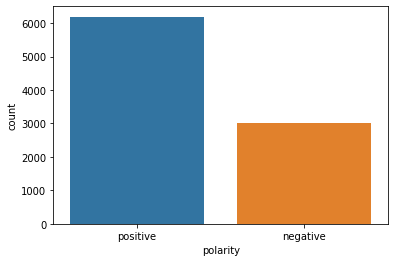

In [41]:
sns.countplot(data = tweeter_test_with_tag_list, x = "polarity")

## Influencer tweets

In [51]:
tweeter_test_with_tag_list.to_csv('All_M1_Tweets_Results_nltk.csv')

In [52]:
test_influencer_tweets = pd.read_csv('influencerM1Tweets.csv')

In [61]:
test_influencer_tweets.shape

(100, 3)

In [82]:
test_influencer_tweets = test_influencer_tweets['text'].tolist()

In [88]:
test_influencer_tweets

['@codefolio So getting a new M1 mac where you can have 650 tabs open is not a selling point for you? 😂 https://t.co/kntV0fE681',
 'The battery life &amp; power management on the new M1 MacBook Pro is surprising.',
 'RT @XBartolomeA: Nuevo post en https://t.co/lCMBxm1jTz:\n"La ingeniería en el núcleo de la transformación"',
 "@wongmjane if you don't want to use the m1 macbook, then please consider donating it to me. I really need a laptop… https://t.co/LOXxmSVHfJ",
 'RT @alyssarzg: Debian GNU/Linux running bare metal on the Apple M1 with a mainline kernel. https://t.co/GWAtwGjqFx',
 '@edanbenatar Buy an M1 MacBook Air and send my son on his dream trip to Scotland.',
 'Mi llanto nace en realidad de la instalación de un repo sobre la arquitectura de una Mac M1 con dependencias algo m… https://t.co/OB4AjbBpyS',
 'RT @SimoneGiertz: The White House is running like a fine-tuned machine https://t.co/9qgHM1MHEn',
 'RT @RubyLibHunt: JRuby 9.3.2 released: ReDoS fix, faster Time#strftime, improve

In [74]:
classifier.classify(extract_features([e.lower() for e in t.split() if len(e) >= 1]))

'negative'

In [89]:
tag_i_list = []
for t in test_influencer_tweets:
    tag_t = classifier.classify(extract_features([e.lower() for e in t.split() if len(e) >= 1]))
    tag_i_list.append(tag_t)

In [90]:
len(tag_i_list)

100

In [91]:
tweeter_test_influencer_with_tag_list = pd.DataFrame(
    {'text': test_influencer_tweets,
     'polarity': tag_i_list,
    })

In [97]:
tweeter_test_influencer_with_tag_list

,text,polarity
0,@codefolio So getting a new M1 mac where you c...,negative
1,The battery life &amp; power management on the...,positive
2,RT @XBartolomeA: Nuevo post en https://t.co/lC...,positive
3,@wongmjane if you don't want to use the m1 mac...,positive
4,RT @alyssarzg: Debian GNU/Linux running bare m...,negative
...,...,...
95,eGPU付けてスペックフルフルのMacBookProより、M1のMacBookAirに直接大...,positive
96,Good to see that Apple's Messages app is still...,negative
97,"RT @AsahiLinux: Of course, Asahi Linux integra...",positive
98,RT @dougallj: I've been reverse engineering th...,negative


In [98]:
#tweeter_test_influencer_with_tag_list['user_id'] = test_influencer_tweets['user_id']

In [99]:
#tweeter_test_influencer_with_tag_list['user_name'] = test_influencer_tweets['user_name']

In [100]:
#tweeter_test_influencer_with_tag_list.to_csv('Influencers_Followers_M1_Tweets_Result_nltk.csv')

In [101]:
tweeter_test_influencer_with_tag_list.shape

(100, 2)

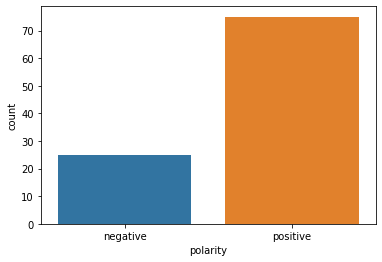

In [102]:
sns.countplot(data = tweeter_test_influencer_with_tag_list, x = "polarity")

In [104]:
tag_i_list

['negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',

In [111]:
count = 0
for i in tag_i_list:
    if i == 'positive':
        count = count + 1

In [112]:
count

75

In [114]:
tweeter_test_influencer_with_tag_list.to_csv('Influencers_Followers_M1_Tweets_Results_nltk.csv')